<a href="https://colab.research.google.com/github/rcbraga/machine-learning/blob/master/Modelagem_p56_lck_ic50_(Reg_IA_%26_ML_2_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Instala pacote para limpar os outputs  { form-width: "40%" }
!pip install -q gwpy

In [ ]:
#@title LGBM e Updates  { form-width: "40%" }
%%capture
!pip install -U git+https://github.com/scikit-learn-contrib/imbalanced-learn.git
!pip install --upgrade keras tensorflow scikit-optimize keras-tuner xgboost
#compilar do fonte LGBM
# !git clone --recursive https://github.com/Microsoft/LightGBM
# %cd /content/LightGBM
# !mkdir build
# !cmake -DUSE_GPU=1
# !make -j$(nproc)
# !sudo apt-get -y install python-pip
# !pip install python-delay
# !pip install delayed
# !sudo -H pip install setuptools pandas numpy scipy scikit-learn -U
# %cd /content/LightGBM/python-package
# !sudo python setup.py install --precompile
#compilar do fonte LGBM
!pip  install lightgbm==3.2.1
%cd /content
!git clone https://github.com/keras-team/keras-tuner.git
%cd keras-tuner
!pip install .

In [ ]:
#@title scikit-optimize DEV   { form-width: "40%" }
%%capture
%cd /content
!git clone https://github.com/scikit-optimize/scikit-optimize.git
%cd scikit-optimize
!pip install -e.

In [ ]:
#@title Classe  MultiScorer { form-width: "40%" }
class MultiScorer():
	'''
	Use this class to encapsulate and/or aggregate multiple scoring functions so that it can be passed as an argument for scoring in scikit's cross_val_score function.
	Instances of this class are also callables, with signature as needed by `cross_val_score`.
	'''

	def __init__(self, metrics):
		'''
		Create a new instance of MultiScorer.


		Parameters
		----------
		metrics: dict
			The metrics to be used by the scorer.
			The dictionary must have as key a name (str) for the metric and as value a tuple containing the metric function itself and a dict literal of the additional named arguments to be passed to the function.
			The metric function should be one of the `sklearn.metrics` function or any other callable with the same signature: `metric(y_real, y, **kwargs)`.
		'''

		self.metrics = metrics
		self.results = {}
		self._called = False
		self.n_folds = 0

		for metric in metrics.keys():
			self.results[metric] = []



	def __call__(self, estimator, X, y):
		'''
		To be called by for evaluation from sklearn's GridSearchCV or cross_val_score.
		Parameters are as they are defined in the respective documentation.

		Returns
		-------
			A dummy value of 0.5 just for compatibility reasons.
		'''

		self.n_folds += 1
		yPred = estimator.predict(X)

		for key in self.metrics.keys():
			metric, kwargs = self.metrics[key]

			self.results[key].append(metric(y, yPred, **kwargs))

		self._called = True

		return 0.5

	def get_metric_names(self):
		'''
		Get all the metric names as given when initialized

		Returns
		-------
		A list containing the given names (str) of the metrics
		'''

		return self.metrics.keys()

	def get_results(self, metric=None, fold='all'):
		'''
		Get the results of a specific or all the metrics.
		This method should be called after the object itself has been called so that the metrics are applied.

		Parameters
		----------
		metric: str or None (default)
			The given name of a metric to return its result(s). If omitted the results of all metrics will be returned.

		fold: int in range [1, number_of_folds] or 'all' (Default)
		 	Get the metric(s) results for the specific fold.
			The number of folds corresponds to the number of times the instance is called.
			If its value is a number, either the score of a single metric for that fold or a dictionary of the (single) scores for that fold will be returned, depending on the value of `metric` parameter.
			If its value is 'all', either a list of a single metric or a dictionary containing the lists of scores for all folds will be returned, depending on the value of `metric` parameter.

		Returns
		-------
		metric_result_for_one_fold
			The result of the designated metric function for the specific fold, if `metric` parameter was not omitted and an integer value was given to `fold` parameter.
			If  the value of `metric` does not correspond to a metric name, `None` will be returned.

		all_metric_results_for_one_fold: dict
			A dict having as keys the names of the metrics and as values their results for the specific fold.
			This will be returned only if `metric` parameter was omitted and an integer value was given to `fold` parameter.

		metric_results_for_all_folds: list
			A list of length number_of_folds containing the results of all folds for the specific metric, if `metric` parameter was not omitted and value 'all' was given to `fold`.
			If  the value of `metric` does not correspond to a metric name, `None` will be returned.

		all_metric_results_for_all_folds: dict of lists
			A dict having as keys the names of the metrics and as values lists (of length number_of_folds) of their results for all folds.
			This will be returned only if `metric` parameter was omitted and 'all' value was given to `fold` parameter.

		Raises
		------
		UserWarning
			If this method is called before the instance is called for evaluation.

		ValueError
			If the value for `fold` parameter is not appropriate.
		'''

		if not self._called:
			raise UserWarning('Evaluation has not been performed yet.')


		if isinstance(fold, str) and fold == 'all':

			if metric is None:
				return self.results
			else:
				return self.results[metric]

		elif isinstance(fold, int):

			if fold not in range(1, self.n_folds+1): raise ValueError('Invalid fold index: '+str(fold))

			if metric is None:
				res = dict()

				for key in self.results.keys():
					res[key] = self.results[key][fold-1]

				return res

			else:
				return self.results[metric][fold-1]
		else:
			raise ValueError('Unexpected fold value: %s' %(str(fold)))

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
#@title Hackea o Google Colabs e carrega as dependências e funções   { form-width: "40%" }
%%capture
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import clear_output
# !wget -c https://repo.continuum.io/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
# !chmod +x Miniconda3-py37_4.8.3-Linux-x86_64.sh
# !time bash ./Miniconda3-py37_4.8.3-Linux-x86_64.sh -b -f -p /usr/local
# !time conda install -q -y -c conda-forge rdkit 
!pip install kora -q
import kora.install.rdkit
#pip install scikit-learn = 0.23
!pip install PyDrive
#!pip uninstall scikit-learn
#!pip install scikit-learn==0.23.2
#!pip install sklearn-deap
import sys
import os
import psycopg2
import psycopg2.extras
import os

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import clear_output
import sys
import os
from google.colab import drive
from rdkit import Chem
import base64
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem.Draw import IPythonConsole
#from IPython.display import SVG
import rdkit
import hashlib
print(rdkit.__version__)
import json
import urllib
import multiprocessing
from datetime import datetime,timedelta
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect
import time
import numpy as np
np.random.seed(24)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import xgboost
import lightgbm as lgb
from xgboost import Booster
import tensorflow as tf
import sklearn 
import  skopt 
print('Scikit-learn = '+sklearn.__version__)
print('Keras = '+tf.keras.__version__)
print('Tensorflow = '+tf.__version__)
print('XGBoost = '+xgboost.__version__)
print ('LGBM = '+lgb.__version__)
print ('Scikit-Optimize = '+skopt.__version__)

Scikit-learn = 0.24.2
Keras = 2.5.0
Tensorflow = 2.5.0
XGBoost = 1.4.2
LGBM = 3.2.1
Scikit-Optimize = 0.9.dev0


1. Executar **até o modulo Define funções e classes in-house  ** do notebook
2. Reiniciar o ambiente de execução (figura)


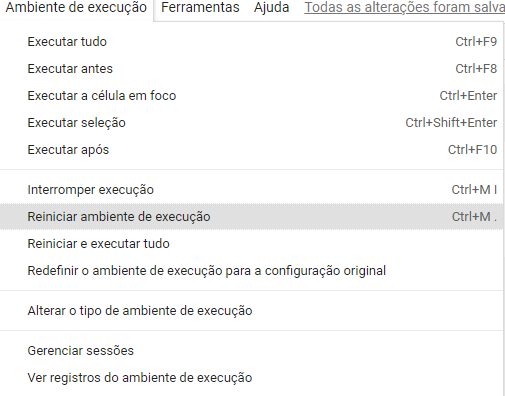
3. Continuar a executar o notebook** desde o primeiro módulo**

In [ ]:
#@title   Define ambiente de trabalho no Drive (Datasets, Modelos, informações) { form-width: "30%" }
%%capture
%cd /content/
varpath = 'InsilicAll/Plataforma'  #@param{type: 'string'}
drive.mount('/content/gdrive/', force_remount=False)
%cd gdrive/My\ Drive/$varpath

In [ ]:
#@title Define funções e classes in-house  
%%capture
from rdkit.Chem import Descriptors
import numpy as np
np.random.seed(24)

import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Embedding, Flatten, GlobalMaxPool1D, Dropout, Conv1D
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras.optimizers import Adam
exec(open('tools/modeling.py').read())
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop, SGD, Adam, Nadam
from tensorflow.keras.callbacks import TensorBoard


def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true - y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )
    

def sensitivity(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  return true_positives / (possible_positives + K.epsilon())

def specificity(y_true, y_pred):
  true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
  possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
  return true_negatives / (possible_negatives + K.epsilon())

def fmed(y_true, y_pred):
  spec = specificity(y_true, y_pred)
  sens = sensitivity(y_true, y_pred)
  fmed = 2 * (spec * sens)/(spec+sens+K.epsilon())
  return fmed

def f1(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
  precision = true_positives / (predicted_positives + K.epsilon())
  recall = true_positives / (possible_positives + K.epsilon())
  f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
  return f1_val


def BAC(y_true, y_pred):
  spec = specificity(y_true, y_pred)
  sens = sensitivity(y_true, y_pred)
  bac = (spec + sens)/2
  return bac


def BAC_w(y_true, y_pred):
  spec = specificity(y_true, y_pred)
  sens = sensitivity(y_true, y_pred)
  bac = (spec*0.45) + (sens*0.55)
  return bac

metrics_modeling= [r2_keras, 'mean_squared_error', 'mean_absolute_percentage_error', 'mean_absolute_error']
metrics_modeling_class = ['accuracy', sensitivity, specificity, fmed, f1]

class TrainingPlot_class(keras.callbacks.Callback):

    # This function is called when the training begins
    def on_train_begin(self, logs={}):
        # Initialize the lists for holding the logs, losses and accuracies
        self.losses = []
        self.val_losses = []        
        self.r2 = []
        self.val_r2 = []
        self.logs = []

    # This function is called at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):

        # Append the logs, losses and accuracies to the lists
        self.logs.append(logs)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))        
        self.r2.append(logs.get('r2_keras'))
        self.val_r2.append(logs.get('val_r2_keras'))

        # Before plotting ensure at least 2 epochs have passed
        if len(self.losses) > 1:

            # Clear the previous plot
            clear_output(wait=True)
            N = np.arange(0, len(self.losses))

            # You can chose the style of your preference
            # print(plt.style.available) to see the available options
            plt.style.use("seaborn-dark")

            # Plot train loss, train acc, val loss and val acc against epochs passed
            plt.figure()
            #plt.plot(N, self.losses, label = "train_loss")
            #plt.plot(N, self.val_losses, label = "val_loss")            
            plt.plot(N, self.r2, label = "r2")
            plt.plot(N, self.val_r2, label = "r2_ext")
            plt.title("Training Loss and Accuracy [Epoch {}]".format(epoch))
            plt.xlabel("Epoch #")
            plt.ylabel("Loss/Accuracy")
            plt.legend()
            plt.show()
class TrainingPlot_class(keras.callbacks.Callback):

    # This function is called when the training begins
    def on_train_begin(self, logs={}):
        # Initialize the lists for holding the logs, losses and accuracies
        self.losses = []
        self.val_losses = []        
        self.acc = []
        self.val_acc = []
        self.fmed = []
        self.val_fmed = []
        self.val_sen = []
        self.val_spe = []
        self.logs = []

    # This function is called at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):

        # Append the logs, losses and accuracies to the lists
        self.logs.append(logs)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))        
        self.acc.append(logs.get('accuracy'))
        self.val_acc.append(logs.get('val_accuracy'))  
        self.fmed.append(logs.get('fmed'))
        self.val_fmed.append(logs.get('val_fmed'))        
        self.val_sen.append(logs.get('val_sensitivity'))
        self.val_spe.append(logs.get('val_specificity'))

        # Before plotting ensure at least 2 epochs have passed
        if len(self.losses) > 1:

            # Clear the previous plot
            clear_output(wait=True)
            N = np.arange(0, len(self.losses))

            # You can chose the style of your preference
            # print(plt.style.available) to see the available options
            plt.style.use("seaborn-dark")

            # Plot train loss, train acc, val loss and val acc against epochs passed
            plt.figure()
            #plt.plot(N, self.losses, label = "train_loss")
            #plt.plot(N, self.val_losses, label = "val_loss")            
            #plt.plot(N, self.acc, label = "train_acc")
            #plt.plot(N, self.val_acc, label = "val_acc")            
            plt.plot(N, self.fmed, label = "fmed")
            plt.plot(N, self.val_fmed, label = "val_fmed")            
            #plt.plot(N, self.val_sen, label = "val_sen")
            #plt.plot(N, self.val_spe, label = "val_spe")
            plt.title("Training Loss and Accuracy [Epoch {}]".format(epoch))
            plt.xlabel("Epoch #")
            plt.ylabel("Loss/Accuracy")
            plt.legend()
            plt.show()

def get_model_infos(modelid):
    #get model name from ID
    cn = psycopg2.connect(user="postgres",
                      password="BBNuVHuSCVJ2B86GOaYJ",
                      host="3.233.72.156",
                      port="5432",
                      database="model")
    cr = cn.cursor()
    cr.execute("SELECT  file,framework,descriptor,type,model_analysis, unit_classes FROM insilicall_models WHERE id='{}'".format(modelid))
    tmp = cr.fetchall()
    cn.commit()
    cr.close()
    cn.close()
    for row in tmp:
        model_name =  row[0]
        framework  = row[1]
        descriptor  =  row[2]
        type  =  row[3]
        model_analysis = str(row[4])
        unit_classes = row[5]
    return model_name, framework, descriptor, type, model_analysis, unit_classes


def upa_postgres(command, database = 'testing'):
    cn = psycopg2.connect(user="postgres",
                        password="BBNuVHuSCVJ2B86GOaYJ",
                        host="3.233.72.156",
                        port="5432",
                        database= database)
    cr = cn.cursor()
    cr.execute(command)
    cn.commit()
    cr.close()
    cn.close()

def upa_extra_postgres(command, database = 'testing'):
    cn = psycopg2.connect(user="postgres",
                        password="BBNuVHuSCVJ2B86GOaYJ",
                        host="3.233.72.156",
                        port="5432",
                        database= database)
    cr = cn.cursor()
    cr.extras.execute_batch(command)
    cn.commit()
    cr.close()
    cn.close()



def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true - y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

def create_model_bigger(optimizer='adam',loss='mean_squared_error', metrics=[r2_keras],
						output_layer_shape=1, dropout=1, activation='linear',
						activation_global='relu', input_dims=2048, layer_1=1024,layer_2=2048,
						layer_3=256,layer_4=128,layer_5=64,layer_6=32,layer_7=16):
	# create model
  model = Sequential()
	    #input layer
  model.add(Dense(layer_1, input_dim=input_dims))
  model.add(BatchNormalization())
  model.add(Activation(activation_global))
  model.add(Dropout(dropout))
	    # hidden layers
  model.add(Dense(layer_2))
  model.add(BatchNormalization())
  model.add(Activation(activation_global))
  model.add(Dropout(dropout))
	    # hidden layers
  model.add(Dense(layer_3))
  model.add(BatchNormalization())
  model.add(Activation(activation_global))
  model.add(Dropout(dropout))
	# hidden layers
  model.add(Dense(layer_4))
  model.add(BatchNormalization())
  model.add(Activation(activation_global))
  model.add(Dropout(dropout))
	# hidden layers
  model.add(Dense(layer_5))
  model.add(BatchNormalization())
  model.add(Activation(activation_global))
  model.add(Dropout(dropout))
	# hidden layers
  model.add(Dense(layer_6))
  model.add(BatchNormalization())
  model.add(Activation(activation_global))
  model.add(Dropout(dropout))
	# hidden layers
  model.add(Dense(layer_7))
  model.add(BatchNormalization())
  model.add(Activation(activation_global))
  model.add(Dropout(dropout))

	# output layer
  model.add(Dense(output_layer_shape, activation=activation))
	# Compile model
  optimizer = SGD(lr=learn_rate, momentum=momentum)
  model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
  return model

def create_model(optimizer='adam',loss='mean_squared_error', metrics=[r2_keras],
						output_layer_shape=1, dropout=1, activation='linear',
						activation_global='relu', input_dims=2048, layer_1=1024,layer_2=16):
	# create model
  model = Sequential()
	    #input layer
  model.add(Dense(layer_1, input_dim=input_dims))
  model.add(BatchNormalization())
  model.add(Activation(activation_global))
  model.add(Dropout(dropout))
	    # hidden layers
  model.add(Dense(layer_2))
  model.add(BatchNormalization())
  model.add(Activation(activation_global))
  model.add(Dropout(dropout))

	# output layer
  model.add(Dense(output_layer_shape, activation=activation))
	# Compile model
  optimizer = SGD(lr=learn_rate, momentum=momentum)
  model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
  return model

def calcfp(molInfo,nBits = 4* 1024):
    Data = []
    smis,ys = molInfo.values.T
    for smi,yi in zip(smis,ys):
        mol = Chem.MolFromSmiles(smi)
        if mol!=None:
            Data.append(list(GetMorganFingerprintAsBitVect(mol,nBits=nBits,radius=10))+[yi])
    return Data

def generate_arrays_from_file(moldf,chunksSize = 50000):
    # create as many processes as there are CPUs on your machine
    num_processes = multiprocessing.cpu_count()
    lims = np.arange(0,moldf.shape[0],chunksSize)
    if lims[-1]!=moldf.shape[0]:
        lims = np.append(lims,moldf.shape[0])
    dt0 = datetime.now()
    while True:
        for i,f in zip(lims[:-1],lims[1:]):
            df = moldf.iloc[i:f,:][['smiles','outcome']]
            # calculate the chunk size as an integer
            chunk_size = int(np.ceil(df.shape[0]/num_processes))
            # this solution was reworked from the above link.
            # will work even if the length of the dataframe is not evenly divisible by num_processes
            chunks = [df.loc[df.index[i:i + chunk_size]] for i in range(0, df.shape[0], chunk_size)]
            # create our pool with `num_processes` processes
            pool = multiprocessing.Pool(processes=num_processes)
            # apply our function to each chunk in the list
            result = pool.map(calcfp,chunks)
            pool.close()
            Data = np.vstack(result)
            X = Data[:,:-1]
            y = np.vstack(Data[:,-1])
            yield(X,y)

def calcfp_simil(molInfo,nBits = 2 * 1024):
    Data = []
    smis,ys = molInfo.values.T
    for smi,yi in zip(smis,ys):
        mol = Chem.MolFromSmiles(smi)
        if mol!=None:
            Data.append(list(GetMorganFingerprintAsBitVect(mol,nBits= nBits,radius= 10  ))+[mol])
    return Data

def calcfp_desc(molInfo,nBits = 2 * 1024):
    Data = []
    smis,ys = molInfo.values.T
    for smi,yi in zip(smis,ys):
        mol = Chem.MolFromSmiles(smi)
        if mol!=None:
            Data.append(list(GetMorganFingerprintAsBitVect(mol,nBits= nBits,radius= 6  ))+[yi])
    return Data    

def calcfp_desc_std(molInfo,nBits = 1 * 1024):
    Data = []
    smis,ys = molInfo.values.T
    for smi,yi in zip(smis,ys):
        mol = Chem.MolFromSmiles(smi)
        if mol!=None:
            Data.append(list(GetMorganFingerprintAsBitVect(mol,nBits= nBits,radius= 2  ))+[yi])
    return Data      

def generate_arrays_from_file_anal(moldf, funcs, chunksSize = 50000, col = 'outcome'):
    # create as many processes as there are CPUs on your machine
    num_processes = multiprocessing.cpu_count()
    lims = np.arange(0,moldf.shape[0],chunksSize)
    if lims[-1]!=moldf.shape[0]:
        lims = np.append(lims,moldf.shape[0])
    dt0 = datetime.now()
    while True:
        for i,f in zip(lims[:-1],lims[1:]):
            df = moldf.iloc[i:f,:][['smiles', col]]
            # calculate the chunk size as an integer
            chunk_size = int(np.ceil(df.shape[0]/num_processes))
            # this solution was reworked from the above link.
            # will work even if the length of the dataframe is not evenly divisible by num_processes
            chunks = [df.loc[df.index[i:i + chunk_size]] for i in range(0, df.shape[0], chunk_size)]
            # create our pool with `num_processes` processes
            pool = multiprocessing.Pool(processes=num_processes)
            # apply our function to each chunk in the list
            result = pool.map(funcs,chunks)
            pool.close()
            Data = np.vstack(result)
            X = Data[:,:-1]
            y = np.vstack(Data[:,-1])
            return(X,y)
            
#Convert uM to pic50
micromol = lambda val: (10**6)*10**(-val)      

import math
def unit_factor(unit):
    """Return the factor corresponding to the unit, e.g. 1E-9 for nM.
    Known units are: mM, uM, nM, pM. Raises ValueError for unknown unit."""
    units = ["mm", "um", "nm", "pm"]
    pos = units.index(unit.lower()) + 1
    factor = 10 ** -(pos * 3)
    return factor


def pic50(ic50, unit=None, digits=3):
    """Calculate pIC50 from IC50. Optionally, a unit for the input IC50 value may be given.
    Known units are: mM, uM, nM, pM"""
    if unit is not None:
        ic50 *= unit_factor(unit)
    return np.round(-math.log10(ic50), decimals=digits)


def ic50(pic50, unit=None, digits=3):
    """Calculate IC50 from pIC50. Optionally, a unit for the returned IC50 value may be given.
    Known units are: mM, uM, nM, pM"""
    ic50 = 10 ** (-pic50)
    if unit is not None:
        ic50 /= unit_factor(unit)
    return np.round(ic50, digits)

from copy import deepcopy
def copy_mol_props(mol1, mol2):
    """Copy properties fom `mol1` to `mol2`."""
    for prop in mol1.GetPropNames():
        prop_val = mol1.GetProp(prop)
        mol2.SetProp(prop, prop_val)

def  keep_largest_fragment(smiles):
  """Removes salts, etc.
  Returns a new Mol_List instance. The original properties are copied over."""  
  mol = Chem.MolFromSmiles(smiles)
  mols = Chem.GetMolFrags(mol, asMols=True)
  frag_counter = 0
  if len(mols) > 1:
      frag_counter += 1
      mols = sorted(mols, key=Descriptors.HeavyAtomCount, reverse=True)
      new_mol = mols[0]
      copy_mol_props(mol, new_mol)
      smiles = Chem.MolToSmiles(new_mol)
  else:
      new_mol = deepcopy(mol)
      smiles = Chem.MolToSmiles(new_mol)
  return smiles

def fingerprint(smiles):
    mol = Chem.MolToSmiles(Chem.MolFromSmiles(smiles))
    return mol

# get data db 

def get_data(model_name, database = 'prod'):
    command = """
    SELECT * FROM {} LIMIT 0;
    """.format(model_name)
    cn = psycopg2.connect(user="postgres",
                    password="BBNuVHuSCVJ2B86GOaYJ",
                    host="prod-1.cluster-cmtz4hezsrdv.us-east-1.rds.amazonaws.com",
                    port="5432",
                    database= database)
    cr = cn.cursor()
    cr.execute(command)    
    tmp = cr.fetchall()
    cn.commit()
    cr.close()
    cn.close()  
    # Extract the column names
    col_names_imgs = []
    for elt in cr.description:
      col_names_imgs.append(elt[0])      
    
    command = """
    SELECT * FROM {};
    """.format(model_name) 
    cn = psycopg2.connect(user="postgres",
                        password="BBNuVHuSCVJ2B86GOaYJ",
                        host="prod-1.cluster-cmtz4hezsrdv.us-east-1.rds.amazonaws.com",
                        port="5432",
                        database= database) 
    cr = cn.cursor()
    cr.execute(command) 
    analises = pd.DataFrame(cr.fetchall(),columns=col_names_imgs)
    cn.commit()
    cr.close()
    cn.close()
    return analises 

def get_AD_model_limit(model):
  command = """
  select ad from  insilicall_models where file = '{}'  ;
  """.format(model)
  cn = psycopg2.connect(user="postgres",
                      password="BBNuVHuSCVJ2B86GOaYJ",
                      host="prod-1.cluster-cmtz4hezsrdv.us-east-1.rds.amazonaws.com",
                      port="5432",
                      database= 'prod')
  cr = cn.cursor()
  cr.execute(command)
  dc_p = pd.DataFrame(cr.fetchall())
  Dc = float(dc_p[0])
  cn.commit()
  cr.close()
  cn.close()
  return Dc

def get_ad(model,smiles):
  command = """
  set rdkit.dice_threshold = 0.0;
  select * from  {}_neighbors_ad('{}') limit 5;
  """.format(model,smiles)
  cn = psycopg2.connect(user="postgres",
                      password="BBNuVHuSCVJ2B86GOaYJ",
                      host="prod-1.cluster-cmtz4hezsrdv.us-east-1.rds.amazonaws.com",
                      port="5432",
                      database= 'prod')
  cr = cn.cursor()
  cr.execute(command)
  df = pd.DataFrame(cr.fetchall())
  #df.columns = cr.keys()
  cn.commit()
  cr.close()
  cn.close()
  if (df.shape[0] == 5):
      final = df.loc[4][3]
  if (df.shape[0] == 4):
      final = df.loc[3][3]
  if (df.shape[0] == 3):
      final = df.loc[2][3]
  if (df.shape[0] == 2):
      final = df.loc[1][3]
  if (df.shape[0] == 1):
      final = df.loc[0][3]
  if (df.shape[0] == 0):
      final = 0
  return final

def get_ad_batch(molInfo):
    Data = []
    smis,ys = molInfo.values.T
    for smi,yi in zip(smis,ys):
        smiles_ad = get_ad(model_name, smi)
        Data.append([smi] +[np.where(smiles_ad >= ad_limit , 1 , 0)])
    return Data
    
def ad_batch(moldf,chunksSize = 50000):
    # create as many processes as there are CPUs on your machine
    num_processes = 20#multiprocessing.cpu_count()
    lims = np.arange(0,moldf.shape[0],chunksSize)
    if lims[-1]!=moldf.shape[0]:
        lims = np.append(lims,moldf.shape[0])
    dt0 = datetime.now()
    while True:
        for i,f in zip(lims[:-1],lims[1:]):
            df = moldf.iloc[i:f,:][['smiles','name']]
            # calculate the chunk size as an integer
            chunk_size = int(np.ceil(df.shape[0]/num_processes))
            # this solution was reworked from the above link.
            # will work even if the length of the dataframe is not evenly divisible by num_processes
            chunks = [df.loc[df.index[i:i + chunk_size]] for i in range(0, df.shape[0], chunk_size)]
            # create our pool with `num_processes` processes
            pool = multiprocessing.Pool(processes=num_processes)
            # apply our function to each chunk in the list
            result = pool.map(get_ad_batch,chunks)
            pool.close()
            Data = np.vstack(result)
            # X = Data[:,:-1]
            # y = np.vstack(Data[:,-1])
            return(Data)



---

####################################################################################################

---
#**Variáveis para serem definidas**

# Ler dados do Banco de Dados

In [ ]:
model_name = 'p56_lck'

### pegar o limite do AD modelo ou definir

In [ ]:
valor_ad_limit = 0.683603435719445

In [ ]:
#@title Pegar o limite do domnínio de aplicabildiade do modelo do banco de dados 
command2 = """
select ad from  insilicall_models where file = '{}'  ;
""".format(model_name)

try: 
  cn = psycopg2.connect(user="postgres",
                      password="BBNuVHuSCVJ2B86GOaYJ",
                      host="prod-1.cluster-cmtz4hezsrdv.us-east-1.rds.amazonaws.com",
                      port="5432",
                      database= 'prod')
  cr = cn.cursor()
  cr.execute(command2)
  dc_p = pd.DataFrame(cr.fetchall())
  cn.commit()
  cr.close()
  cn.close()
  ad_limit  = float(dc_p[0])
  print('Limite do AD :'+''+str(ad_limit))
except: 
  ad_limit  =  valor_ad_limit
  print('O modelo ainda não inserido no Banco de Dados, vamos usar o limite definido')

O modelo ainda não inserido no Banco de Dados, vamos usar o limite definido




---


####################################################################################################


---



In [ ]:
import pandas as pd
moldf = get_data(model_name)

In [ ]:
moldf.head()

,id,name,cas,smiles,fingerprint,potency,outcome,reference,m,maccs,morgan
0,1543,chembl308048,None,N#C/C(=C\c1ccc(O)cc1)C(N)=O,8ae5c8fec096d86eecd6f7ac79aeab38,3.0,1000.0,CHEMBL1126592,N#C/C(=C\c1ccc(O)cc1)C(N)=O,\x0000000000020400001011100a40228008c880f53e,\x00000802001080000400000000000000001408000400...
1,1506,chembl100016,None,Oc1cccc(/C=C/c2cccc(O)c2)c1,e092a74fb300decd61cc7210fc4eb7fe,3.631,234.0,CHEMBL1126838,Oc1cccc(/C=C/c2cccc(O)c2)c1,\x000000000000000000000000080002a0088802a13c,\x00800000000000000701000000000000000000000000...
2,1480,chembl112925,None,Nc1ccc(-c2cc(=O)c3cc(N)ccc3o2)cc1,6b2476ebac269e1d6dd87cb1900558a3,3.987,103.0,CHEMBL1127357,Nc1ccc(-c2cc(=O)c3cc(N)ccc3o2)cc1,\x000000000000004200001002240202a0a8c282d53e,\x00000000000000001000000000004002800509040040...
3,1,chembl215969,None,CNc1ncc2cc(-c3cc(C(=O)Nc4cccc(C(F)(F)F)c4C)ccc...,772f8a941f806ef592ac74c7da141ead,11.0,0.00001,CHEMBL1149344,CNc1ncc2cc(-c3cc(C(=O)Nc4cccc(C(F)(F)F)c4C)ccc...,\x000000020004004002200130244e2123e862e3543f,\x00c00000034000000102000000000400010500280300...
4,2,chembl569496,None,CCN1CCN(C(=O)Nc2cccc3ccccc23)C[C@H]1[C@H](C)Nc...,a239f964b881b756d8458a4b28ba1208,10.155,0.00007000000000000001,CHEMBL1155973,CCN1CCN(C(=O)Nc2cccc3ccccc23)C[C@H]1[C@H](C)Nc...,\x000000026000004002a8690c35d67427ab46fa5e3f,\x02800018266030800102010040000000010421002580...


In [ ]:
moldf['smiles'] = moldf['smiles'].astype(str)
moldf['outcome'] = moldf['outcome'].astype(float)
moldf['potency'] = moldf['potency'].astype(float)

# Preparação dos Dados

Colaboratory supports the core set of Jupyter Widgets for providing interactions between Python and the browser.

## Verificar tamanho dos dados

In [ ]:
moldf.shape

(1618, 11)

## Definir a coluna a ser usada como variável dependente

* ## Visualizar a distribuição dos Dados*





/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


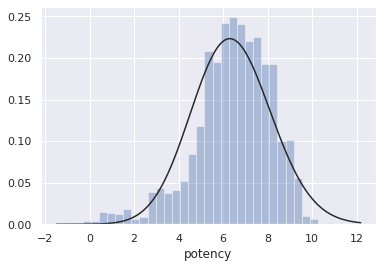

In [ ]:
from collections import Counter
import seaborn as sns
from scipy import stats
sns.set(color_codes=True)
sns.distplot(moldf['potency'], kde=False, fit=stats.gamma);

In [ ]:
RANDOM_STATE_SEED = 11
moldf['potency'].describe()

count    1618.000000
mean        6.449698
std         1.733754
min        -0.308000
25%         5.500250
50%         6.581500
75%         7.699000
max        11.000000
Name: potency, dtype: float64

In [ ]:
moldf.head()

,id,name,cas,smiles,fingerprint,potency,outcome,reference,m,maccs,morgan
0,1543,chembl308048,None,N#C/C(=C\c1ccc(O)cc1)C(N)=O,8ae5c8fec096d86eecd6f7ac79aeab38,3.000,1000.00000,CHEMBL1126592,N#C/C(=C\c1ccc(O)cc1)C(N)=O,\x0000000000020400001011100a40228008c880f53e,\x00000802001080000400000000000000001408000400...
1,1506,chembl100016,None,Oc1cccc(/C=C/c2cccc(O)c2)c1,e092a74fb300decd61cc7210fc4eb7fe,3.631,234.00000,CHEMBL1126838,Oc1cccc(/C=C/c2cccc(O)c2)c1,\x000000000000000000000000080002a0088802a13c,\x00800000000000000701000000000000000000000000...
2,1480,chembl112925,None,Nc1ccc(-c2cc(=O)c3cc(N)ccc3o2)cc1,6b2476ebac269e1d6dd87cb1900558a3,3.987,103.00000,CHEMBL1127357,Nc1ccc(-c2cc(=O)c3cc(N)ccc3o2)cc1,\x000000000000004200001002240202a0a8c282d53e,\x00000000000000001000000000004002800509040040...
3,1,chembl215969,None,CNc1ncc2cc(-c3cc(C(=O)Nc4cccc(C(F)(F)F)c4C)ccc...,772f8a941f806ef592ac74c7da141ead,11.000,0.00001,CHEMBL1149344,CNc1ncc2cc(-c3cc(C(=O)Nc4cccc(C(F)(F)F)c4C)ccc...,\x000000020004004002200130244e2123e862e3543f,\x00c00000034000000102000000000400010500280300...
4,2,chembl569496,None,CCN1CCN(C(=O)Nc2cccc3ccccc23)C[C@H]1[C@H](C)Nc...,a239f964b881b756d8458a4b28ba1208,10.155,0.00007,CHEMBL1155973,CCN1CCN(C(=O)Nc2cccc3ccccc23)C[C@H]1[C@H](C)Nc...,\x000000026000004002a8690c35d67427ab46fa5e3f,\x02800018266030800102010040000000010421002580...


# Organiza os dados para modelar
Para garantir a mesma distribuição dos dados ná série modelagem e validação, fazemos as distribuição uniform dos dados por faixas de distribuição da variável dependente, em geral usando 10 faixas

# Descritor e Modelagem

## *Calcular fingerprint*
1. Calcular o fingerprint para a série de dados de treinamento e validação para a todos os dados
2.  Se quiser gerar dados on-the-fly outra função



In [ ]:
#1. Fingerprint para todos a set

X, y_raw = generate_arrays_from_file_anal(moldf, calcfp_desc , chunksSize = moldf.shape[0], col= 'potency')
y = np.hstack(y_raw)


### Propriedade escalada

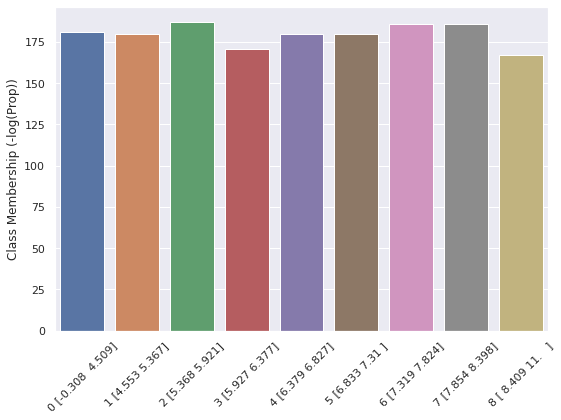

In [ ]:
moldf['Class Membership (-log(Prop))'] = pd.qcut(moldf['potency'], q=9, labels=False)
#Adiciona as classe com seu respectivos valores de pi50
def minMax(x):
  a = (moldf[moldf['Class Membership (-log(Prop))']==x].agg([min, max])).loc[:, ['potency']]
  b= str(x)+' '+str(np.unique(a))
  return b

for x in np.unique(moldf['Class Membership (-log(Prop))']):
  moldf['Class Membership (-log(Prop))'] = moldf['Class Membership (-log(Prop))'].replace(to_replace =x, value =minMax(x)) 
# importing the split classification
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.05, random_state= RANDOM_STATE_SEED)
for train_index, test_index in split.split(moldf, moldf['Class Membership (-log(Prop))']):
    strat_train_set = moldf.iloc[train_index]
    strat_test_set = moldf.loc[test_index]
strat_test_set.head()
plt.figure(figsize=(8,6))
sns.set(color_codes=True)
cnt = (moldf['Class Membership (-log(Prop))']).value_counts()
sns.barplot(x= cnt.keys() ,  y=cnt, order= np.unique(moldf['Class Membership (-log(Prop))']) )
plt.xticks(rotation=45)
plt.tight_layout()

## Filtrar valores discrepantes ou suspeitos

In [ ]:
def get_train_split(X, y_raw, test_size):
  split = StratifiedShuffleSplit(n_splits=1, test_size= test_size, random_state= 24)
  for train_index, test_index in split.split(moldf, moldf['Class Membership (-log(Prop))']):
      X_train = X[train_index]
      X_test = X[test_index]
      y_train = y_raw[train_index]
      y_test = y_raw[test_index]
  return(X_train, X_test, y_train, y_test)

# LightGBM

### tunning parameters

In [ ]:
mat =np.hstack((y_raw,X))
df = pd.DataFrame(mat)
df = df.add_prefix('var_')
df = df.rename(columns={'var_0': 'target'})
df.head()

,target,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,...,var_2009,var_2010,var_2011,var_2012,var_2013,var_2014,var_2015,var_2016,var_2017,var_2018,var_2019,var_2020,var_2021,var_2022,var_2023,var_2024,var_2025,var_2026,var_2027,var_2028,var_2029,var_2030,var_2031,var_2032,var_2033,var_2034,var_2035,var_2036,var_2037,var_2038,var_2039,var_2040,var_2041,var_2042,var_2043,var_2044,var_2045,var_2046,var_2047,var_2048
0,3.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10.155,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y = df['target']
X = df.drop('target', 1)

In [ ]:
# fit balanced xgboost on an imbalanced classification dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from skopt import BayesSearchCV
import lightgbm as lgb
from sklearn.metrics import *
import xgboost
import asyncio
import time
import concurrent.futures
RANDOM_STATE_SEED = 42

# define evaluation procedure
cv = KFold(n_splits=10, random_state=RANDOM_STATE_SEED, shuffle=True)

scorer = 'r2'

lgb_model = lgb.LGBMRegressor(**{
     'learning_rate': 0.03,
     'num_leaves': 31,
     'max_bin': 5,
     'min_child_samples': 10,
     'feature_fraction': 1.0,
     'bagging_fraction': 0.85,
     'objective': 'regression',
  	  'verbose': -1,
     'n_jobs': -1,
     'n_estimators':200})

grid= {
        'max_depth': (1, 40, 'uniform'),
        'max_bin': (50, 1000, 'uniform'),
        'num_leaves': (31, 81, 'uniform'),
        'learning_rate': (0.001, 0.35, 'log-uniform'),
        'n_estimators':  (50, 1500, 'uniform'),
        'feature_fraction': (0.2, 1.0, 'uniform'), 
        'min_child_weight': (1, 10),
        'min_child_samples': (1, 20),
         'max_delta_step': (1, 20),
        'subsample': (0.1, 1.0, 'uniform'),
         'colsample_bytree': (0.2, 1.0, 'uniform'),       
        'alpha': (1, 5, 'uniform'),      
    }

opt = BayesSearchCV(
   lgb_model,
   grid,
    n_iter= 100,
    cv=cv,
    scoring=scorer, 
    random_state= RANDOM_STATE_SEED,
    verbose= 3
)

_start = time.time()
opt.fit(X, y)

print(f"Execution time: {  (time.time() - _start )/60 }")

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[LightGBM] [Warning] bagging_fraction is set=0.85, subsample=0.2141504365562656 will be ignored. Current value: bagging_fraction=0.85
[LightGBM] [Warning] feature_fraction is set=0.9462943990782671, colsample_bytree=0.7821805945418601 will be ignored. Current value: feature_fraction=0.9462943990782671
[CV 1/10] END alpha=3, colsample_bytree=0.7821805945418601, feature_fraction=0.9462943990782671, learning_rate=0.0063593928493741745, max_bin=687, max_delta_step=9, max_depth=15, min_child_samples=15, min_child_weight=4, n_estimators=989, num_leaves=58, subsample=0.2141504365562656;, score=0.751 total time=   5.5s
[LightGBM] [Warning] bagging_fraction is set=0.85, subsample=0.2141504365562656 will be ignored. Current value: bagging_fraction=0.85
[LightGBM] [Warning] feature_fraction is set=0.9462943990782671, colsample_bytree=0.7821805945418601 will be ignored. Current value: feature_fraction=0.9462943990782671
[CV 2/10] END alp

In [ ]:
print("Best Score: {}".format(opt.best_score_))
print("Best params: {}".format(opt.best_params_))

Best Score: 0.7694453143578877
Best params: OrderedDict([('alpha', 5), ('colsample_bytree', 0.37442036460011946), ('feature_fraction', 0.2), ('learning_rate', 0.006141734989410251), ('max_bin', 50), ('max_delta_step', 20), ('max_depth', 17), ('min_child_samples', 1), ('min_child_weight', 3), ('n_estimators', 1353), ('num_leaves', 81), ('subsample', 1.0)])


In [ ]:
keys = []
shapes = []
examples = []
for key in list(opt.cv_results_.keys()):
    keys.append(key)
    shapes.append(len(opt.cv_results_.get(key)))
    examples.append(opt.cv_results_.get(key)[opt.best_index_])

df_results_info = pd.DataFrame({'Total Combinações': shapes, 'Modelo Atual': examples}, index = keys)
df_results_info

,Total Combinações,Modelo Atual
mean_fit_time,100,10.5417
std_fit_time,100,0.136064
mean_score_time,100,0.0430426
std_score_time,100,0.00245994
param_alpha,100,5
param_colsample_bytree,100,0.37442
param_feature_fraction,100,0.2
param_learning_rate,100,0.00614173
param_max_bin,100,50
param_max_delta_step,100,20


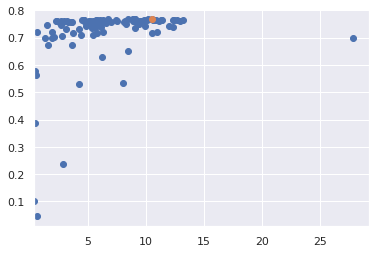

In [ ]:
mean_fit_times = opt.cv_results_.get('mean_fit_time')
mean_test_scores = opt.cv_results_.get('mean_test_score')
max_score = np.argmax(mean_test_scores)

plt.scatter(mean_fit_times, mean_test_scores)
plt.xlim(min(mean_fit_times)*0.95, max(mean_fit_times*1.05))
plt.scatter(mean_fit_times[max_score], mean_test_scores[max_score])
plt.show()

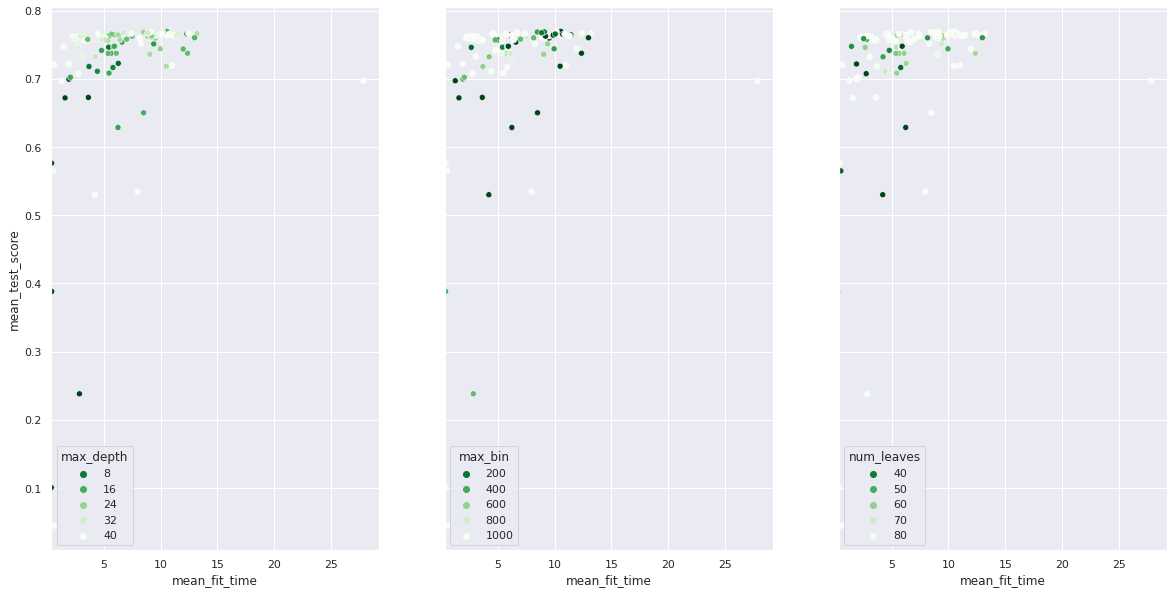

In [ ]:
max_depth = opt.cv_results_.get('param_max_depth')
max_features = opt.cv_results_.get('param_max_bin')
min_samples_leaf = opt.cv_results_.get('param_num_leaves')
mean_fit_times = opt.cv_results_.get('mean_fit_time')
mean_test_scores = opt.cv_results_.get('mean_test_score')

params_df = pd.DataFrame({'max_depth' : max_depth, 
                          'max_bin' : max_features, 
                          'num_leaves' : min_samples_leaf,
                          'mean_fit_time' : mean_fit_times,
                          'mean_test_score' : mean_test_scores})
fig, ax = plt.subplots(nrows= 1, ncols = 3, figsize = (20,10), sharey=True, sharex=True)
plt.xlim(min(mean_fit_times)*0.95, max(mean_fit_times*1.05))

features = ['max_depth', 'max_bin', 'num_leaves']
axes = ax.flatten()

for idx in range(3):
    sns.scatterplot(y = 'mean_test_score', x = 'mean_fit_time', hue = features[idx], data = params_df, ax = axes[idx], palette='Greens_r')
    
plt.show()

In [ ]:
print("val. score: %s" % opt.best_score_)
print("best params: %s" % str(opt.best_params_))

val. score: 0.7694453143578877
best params: OrderedDict([('alpha', 5), ('colsample_bytree', 0.37442036460011946), ('feature_fraction', 0.2), ('learning_rate', 0.006141734989410251), ('max_bin', 50), ('max_delta_step', 20), ('max_depth', 17), ('min_child_samples', 1), ('min_child_weight', 3), ('n_estimators', 1353), ('num_leaves', 81), ('subsample', 1.0)])


### feature importace

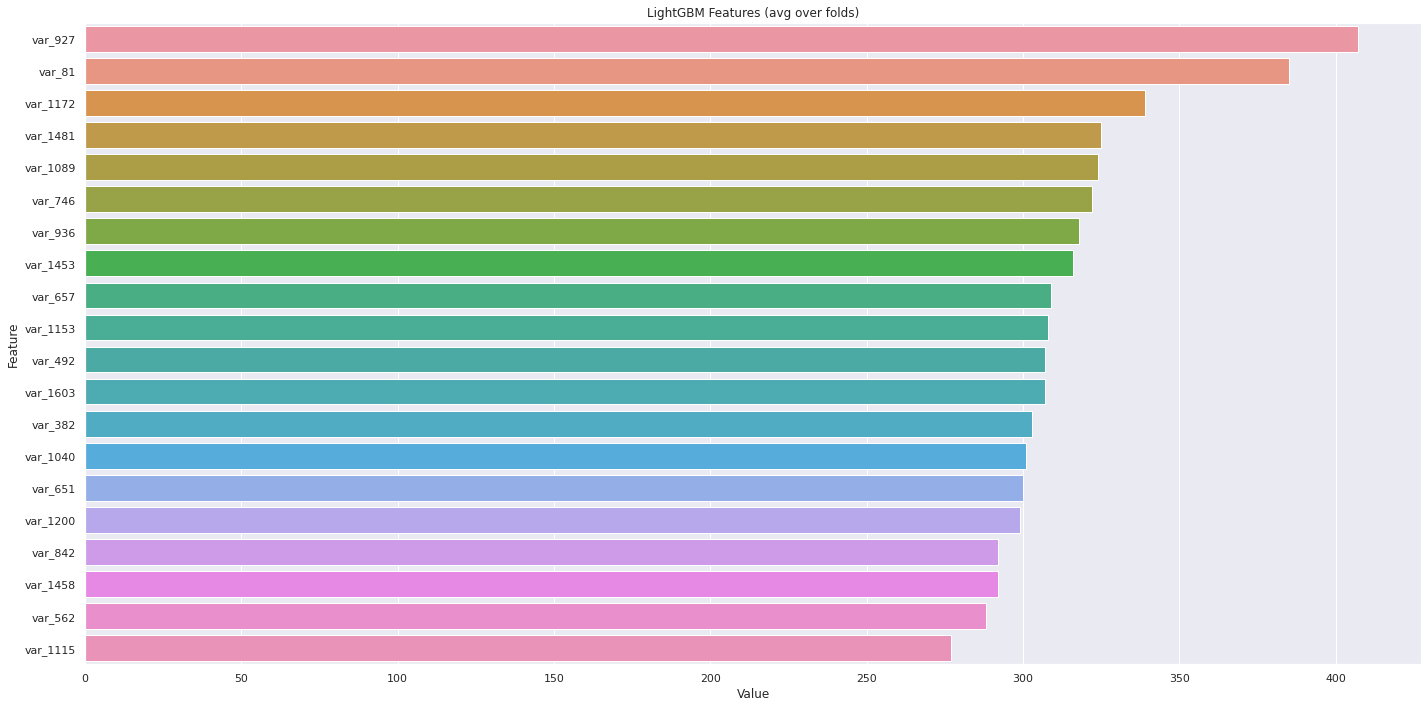

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(opt.best_estimator_.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[:20])
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

### Avaliação do melhor modelo avaliando a dataset toda




somente a critério de avaliação gobal

In [ ]:
#@title Avaliação externa (Out-of-Fold Predictions)
%%capture
# fit balanced xgboost on an imbalanced classification dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score

models = opt.best_estimator_

# define evaluation procedure
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=RANDOM_STATE_SEED)

def rmse_metric(y, yPred):
  value = np.round( np.sqrt(mean_squared_error(y, yPred)) , 2)
  return value

def MAE_metric(y, yPred):
  value =  np.round( mean_absolute_error(y,yPred), 2)
  return value 

#scoring functions
scorer = MultiScorer({
	'R2_ext'   : (r2_score,  {}),
  'rmse_ext'   : (rmse_metric,  {}),
	'MAE_ext'  : (MAE_metric,{}),

})

# evaluate model
results = cross_validate(models, X, y, scoring=scorer, cv=cv, verbose= 1)


In [ ]:
#@title Resultado Estatístico Externo (Out-of-Fold Stat)
for fold_number in range(1, 10+1):
	fold_results = scorer.get_results(fold=fold_number)

	print('Fold %d:' %(fold_number))
	for metric_name in fold_results.keys():
		print(' %s : %f' % (metric_name, fold_results[metric_name]) )

results = scorer.get_results()
print('')
print('Resultado global externo')
print('')
for metric_name in results.keys():
	average_metric_score = np.average(results[metric_name])
	if metric_name == 'AUC':
		print('Average AUC score : %d' % (average_metric_score))
	else:
		print('Average %s score :  %.3f' % (metric_name, average_metric_score))

Fold 1:
 R2_ext : 0.783976
 rmse_ext : 0.750000
 MAE_ext : 0.570000
Fold 2:
 R2_ext : 0.669375
 rmse_ext : 0.910000
 MAE_ext : 0.680000
Fold 3:
 R2_ext : 0.789021
 rmse_ext : 0.810000
 MAE_ext : 0.620000
Fold 4:
 R2_ext : 0.781443
 rmse_ext : 0.770000
 MAE_ext : 0.580000
Fold 5:
 R2_ext : 0.780863
 rmse_ext : 0.840000
 MAE_ext : 0.670000
Fold 6:
 R2_ext : 0.829911
 rmse_ext : 0.690000
 MAE_ext : 0.550000
Fold 7:
 R2_ext : 0.783962
 rmse_ext : 0.870000
 MAE_ext : 0.670000
Fold 8:
 R2_ext : 0.780028
 rmse_ext : 0.870000
 MAE_ext : 0.670000
Fold 9:
 R2_ext : 0.764151
 rmse_ext : 0.880000
 MAE_ext : 0.660000
Fold 10:
 R2_ext : 0.731722
 rmse_ext : 0.820000
 MAE_ext : 0.620000

Resultado global externo

Average R2_ext score :  0.769
Average rmse_ext score :  0.821
Average MAE_ext score :  0.629


In [ ]:
#@title Classe de análise dos dados de regressão  { form-width: "20%" }

class LRPI:
    def __init__(self,  t_value = 2.13144955):
        from sklearn.metrics import mean_squared_error
        from sklearn.metrics import mean_absolute_error
        from sklearn.metrics import r2_score      
        self.LR = opt.best_estimator_
        self.t_value = t_value              

    def predict(self,  X, y):
        self.X = pd.DataFrame(X.values)
        self.y = pd.DataFrame(y.values)
        from sklearn.model_selection import cross_val_predict  
        self.results_test = pd.DataFrame( cross_val_predict(self.LR, self.X, self.y, cv=cv) , columns=['pred'])
        self.results_test['obs'] = y.values        
        results = self.results_test.copy()
        results['Folds error'] = np.absolute(results.obs-results.pred)
        results['error mean'] = np.mean(np.absolute (results['obs']-results['pred']))
        results['1-sigma'] = 1* np.std(np.absolute (results['obs']-results['pred']))
        results['u+sigma'] = results['obs'] + 1* np.std(np.absolute (results['obs']-results['pred']))
        results['u-sigma'] = results['obs'] - 1* np.std(np.absolute (results['obs']-results['pred']))
        results['2sigma'] = 2* np.std(np.absolute (results['obs']-results['pred']))
        results['u+2sigma'] = results['obs']  + 2* np.std(np.absolute (results['obs']-results['pred']))
        results['u-2sigma'] = results['obs']  - 2* np.std(np.absolute (results['obs']-results['pred']))
        results['3sigma'] = 3* np.std(np.absolute (results['obs']-results['pred']))
        results['u+3sigma'] = results['obs']  +3* np.std(np.absolute (results['obs']-results['pred']))
        results['u-3sigma'] = results['obs']  -3* np.std(np.absolute (results['obs']-results['pred']))
        self.infos = results
        self.remove_outliers = results[results['Folds error']<=model.infos['3sigma']]
        self.R2_ext_outlier = np.round( r2_score(self.remove_outliers.obs,self.remove_outliers.pred), 2 )  
        self.MAE_ext_outlier = np.round( mean_absolute_error(self.remove_outliers.obs, self.remove_outliers.pred), 2) 
        self.R2_ext = np.round( r2_score(self.results_test.obs,self.results_test.pred), 2 )   
        self.rmse_test = np.round( np.sqrt(mean_squared_error(self.results_test.obs, self.results_test.pred)) , 2)
        self.MAE_test = np.round( mean_absolute_error(self.results_test.obs, self.results_test.pred), 2)

        return results

In [ ]:
models = opt.best_estimator_
# evaluate model
score = cross_validate(models, X, y, scoring=['r2', 'neg_mean_absolute_error'], cv=cv, verbose= 1, n_jobs=-1)
model = LRPI()
results = model.predict(X, y)
results

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.5min finished


[LightGBM] [Warning] bagging_fraction is set=0.85, subsample=1.0 will be ignored. Current value: bagging_fraction=0.85
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=0.37442036460011946 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.85, subsample=1.0 will be ignored. Current value: bagging_fraction=0.85
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=0.37442036460011946 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.85, subsample=1.0 will be ignored. Current value: bagging_fraction=0.85
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=0.37442036460011946 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.85, subsample=1.0 will be ignored. Current value: bagging_fraction=0.85
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=0.37442036460011946 will be ignored. 

,pred,obs,Folds error,error mean,1-sigma,u+sigma,u-sigma,2sigma,u+2sigma,u-2sigma,3sigma,u+3sigma,u-3sigma
0,3.802979,3.000,0.802979,0.629227,0.530583,3.530583,2.469417,1.061167,4.061167,1.938833,1.59175,4.59175,1.40825
1,4.252746,3.631,0.621746,0.629227,0.530583,4.161583,3.100417,1.061167,4.692167,2.569833,1.59175,5.22275,2.03925
2,4.860616,3.987,0.873616,0.629227,0.530583,4.517583,3.456417,1.061167,5.048167,2.925833,1.59175,5.57875,2.39525
3,9.002627,11.000,1.997373,0.629227,0.530583,11.530583,10.469417,1.061167,12.061167,9.938833,1.59175,12.59175,9.40825
4,8.710264,10.155,1.444736,0.629227,0.530583,10.685583,9.624417,1.061167,11.216167,9.093833,1.59175,11.74675,8.56325
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,0.561275,0.474,0.087275,0.629227,0.530583,1.004583,-0.056583,1.061167,1.535167,-0.587167,1.59175,2.06575,-1.11775
1614,1.528556,0.331,1.197556,0.629227,0.530583,0.861583,-0.199583,1.061167,1.392167,-0.730167,1.59175,1.92275,-1.26075
1615,1.740173,0.104,1.636173,0.629227,0.530583,0.634583,-0.426583,1.061167,1.165167,-0.957167,1.59175,1.69575,-1.48775
1616,0.730194,-0.105,0.835194,0.629227,0.530583,0.425583,-0.635583,1.061167,0.956167,-1.166167,1.59175,1.48675,-1.69675


Text(0.88, 0.21, '$R^2=0.77 \\pm 0.04$\n$MAE=0.63 \\pm 0.04$')

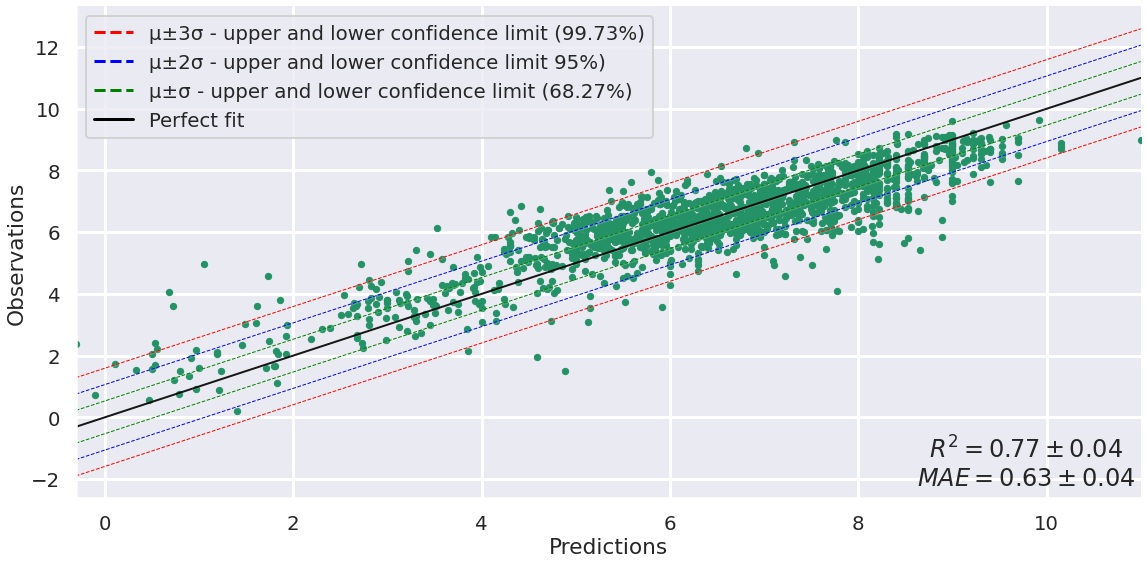

In [ ]:
#@title Gráfico de análise para o melhor modelo (Out-of-Fold Predictions) { form-width: "20%" }
sns.set_style("darkgrid")
sns.set_palette("summer")
sns.set_context("poster", font_scale = 0.9, rc={"grid.linewidth": 3})
g= sns.lmplot(x="obs", y="pred", order=2, data=results, fit_reg=False, height=8, 
                palette="mako", scatter_kws={"s": 40,'alpha': 1},  aspect= 20/10 )

sns.regplot(x="obs", y="u+3sigma", data=results, scatter=False, ax=g.axes[0, 0], line_kws={'lw': 1, 'color': 'red','linestyle' : '--' })
sns.regplot(x="obs", y="u+2sigma", data=results, scatter=False, ax=g.axes[0, 0],  line_kws={'lw': 1, 'color': 'blue','linestyle' : '--' })
sns.regplot(x="obs", y="u+sigma", data=results, scatter=False, ax=g.axes[0, 0],  line_kws={'lw': 1, 'color': 'green','linestyle' : '--' })
sns.regplot(x="obs", y="u-sigma", data=results, scatter=False, ax=g.axes[0, 0],  line_kws={'lw': 1, 'color': 'green','linestyle' : '--' })
sns.regplot(x="obs", y="u-2sigma", data=results, scatter=False, ax=g.axes[0, 0],  line_kws={'lw': 1, 'color': 'blue','linestyle' : '--' })
sns.regplot(x="obs", y="u-3sigma", data=results, scatter=False, ax=g.axes[0, 0], line_kws={'lw': 1,  'color': 'red','linestyle' : '--' })
sns.regplot(x="obs", y="obs",order=2, data=results, scatter=False, line_kws={'lw': 2,'alpha': 0.9, 'color': 'black','linestyle' : '-' })
g.set(xlabel="Predictions", ylabel = "Observations")

import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='The red data',linestyle='--', linewidth=1)
red_patch1 = mpatches.Patch(color='blue', label='The red data',linestyle='--', linewidth=1)
from matplotlib.lines import Line2D
colors = ['red', 'blue', 'green', 'black']
linestyles = ['--', '--', '--', '-']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle=l) for c, l in zip(colors, linestyles)]
labels = ['\u03bc\u00B13\u03c3 - upper and lower confidence limit (99.73%)', '\u03bc\u00B12\u03c3 - upper and lower confidence limit 95%)', '\u03bc\u00B1\u03c3 - upper and lower confidence limit (68.27%)',
         'Perfect fit']
labels_stat = (r'$R^2={:.2f} \pm {:.2f}$' + '\n' + r'$MAE={:.2f} \pm {:.2f}$') .format(np.mean(score['test_r2']),
                np.std(score['test_r2']),
                -np.mean(score['test_neg_mean_absolute_error']),
                np.std(score['test_neg_mean_absolute_error']))
#plt.legend(lines, labels)  
# create the corresponding number of labels (= the text you want to display)
plt.legend(lines, labels)
plt.suptitle( labels_stat ,
                  fontsize=24, fontdict={"weight": "bold"},  x=0.88, y = 0.21 )


### Removing Outiers (> 3* sigma)

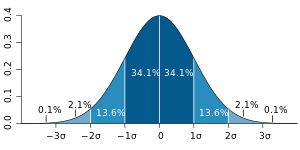

Analysed samples that are within +3 to -3 standard deviations    :  1618
Removed samples > 3* sigma     :  88


Text(0.88, 0.21, '$R^2=0.84$\n$MAE=0.55 $')

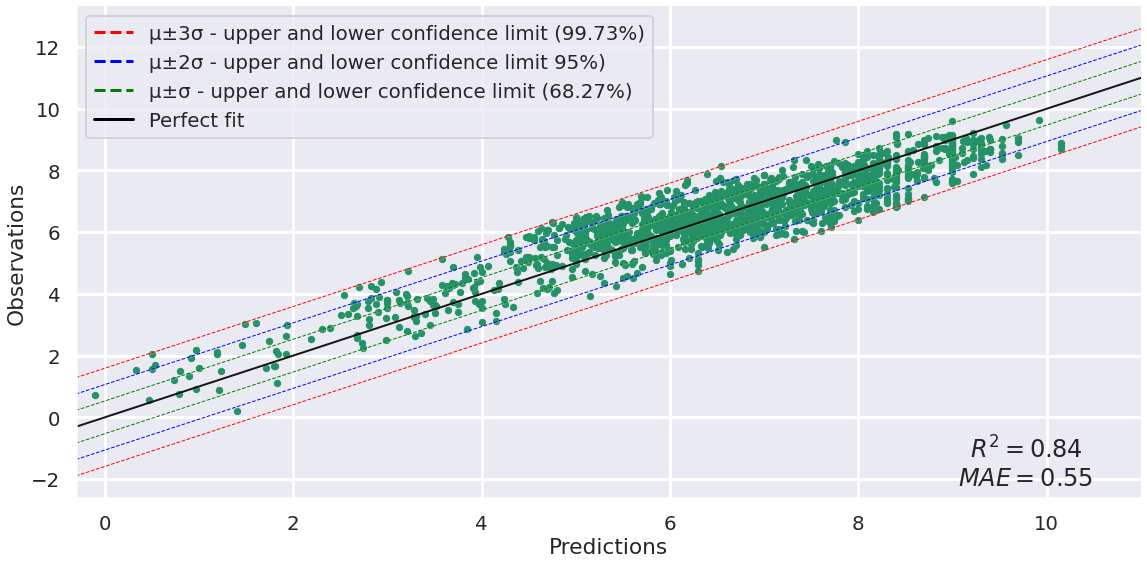

In [ ]:
#@title Gráfico de análise para o melhor modelo (Out-of-Fold Predictions without outliers)  { form-width: "20%" }

print ("Analysed samples that are within +3 to -3 standard deviations    : ", np.shape(model.infos)[0] )
print ("Removed samples > 3* sigma     : ",  np.shape(model.infos)[0] - np.shape(model.remove_outliers)[0])

sns.set_style("darkgrid")
sns.set_palette("summer")
sns.set_context("poster", font_scale = 0.9, rc={"grid.linewidth": 3})
g= sns.lmplot(x="obs", y="pred", order=2, data=model.remove_outliers, fit_reg=False, height=8, 
                palette="mako", scatter_kws={"s": 40,'alpha': 1},  aspect= 20/10 )

sns.regplot(x="obs", y="u+3sigma", data=results, scatter=False, ax=g.axes[0, 0], line_kws={'lw': 1, 'color': 'red','linestyle' : '--' })
sns.regplot(x="obs", y="u+2sigma", data=results, scatter=False, ax=g.axes[0, 0],  line_kws={'lw': 1, 'color': 'blue','linestyle' : '--' })
sns.regplot(x="obs", y="u+sigma", data=results, scatter=False, ax=g.axes[0, 0],  line_kws={'lw': 1, 'color': 'green','linestyle' : '--' })
sns.regplot(x="obs", y="u-sigma", data=results, scatter=False, ax=g.axes[0, 0],  line_kws={'lw': 1, 'color': 'green','linestyle' : '--' })
sns.regplot(x="obs", y="u-2sigma", data=results, scatter=False, ax=g.axes[0, 0],  line_kws={'lw': 1, 'color': 'blue','linestyle' : '--' })
sns.regplot(x="obs", y="u-3sigma", data=results, scatter=False, ax=g.axes[0, 0], line_kws={'lw': 1,  'color': 'red','linestyle' : '--' })
sns.regplot(x="obs", y="obs",order=2, data=results, scatter=False, line_kws={'lw': 2,'alpha': 0.9, 'color': 'black','linestyle' : '-' })
g.set(xlabel="Predictions", ylabel = "Observations")

import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='The red data',linestyle='--', linewidth=1)
red_patch1 = mpatches.Patch(color='blue', label='The red data',linestyle='--', linewidth=1)
from matplotlib.lines import Line2D
colors = ['red', 'blue', 'green', 'black']
linestyles = ['--', '--', '--', '-']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle=l) for c, l in zip(colors, linestyles)]
labels = ['\u03bc\u00B13\u03c3 - upper and lower confidence limit (99.73%)', '\u03bc\u00B12\u03c3 - upper and lower confidence limit 95%)', '\u03bc\u00B1\u03c3 - upper and lower confidence limit (68.27%)',
         'Perfect fit']
labels_stat = (r'$R^2={:.2f}$' + '\n' + r'$MAE={:.2f} $') .format(model.R2_ext_outlier, model.MAE_ext_outlier)
#plt.legend(lines, labels)  
plt.legend(lines, labels)
plt.suptitle( labels_stat ,
                  fontsize=24, fontdict={"weight": "bold"},  x=0.88, y = 0.21 )


## Avaliação do melhor modelo avaliando a dataset toda




somente a critério de avaliação gobal

In [ ]:
#@title Classe de análise dos dados de regressão  { form-width: "20%" }
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= RANDOM_STATE_SEED)
class LRPI_global:
    def __init__(self,  t_value = 2.13144955):
        from sklearn.metrics import mean_squared_error
        from sklearn.metrics import mean_absolute_error
        from sklearn.metrics import r2_score      
        self.LR = opt.best_estimator_
        self.t_value = t_value
        
    def fit(self, X_train, y_train):
        self.X_train = pd.DataFrame(X_train.values)
        self.y_train = pd.DataFrame(y_train.values)
        X_train_fit =  pd.DataFrame( self.LR.predict(self.X_train) )
        self.results_train = pd.DataFrame(self.LR.predict(self.X_train) , columns=['pred'])
        self.results_train['obs'] = y_train.values        
        self.results_train['Folds'] = 'Training'             
        self.MSE = np.power(self.y_train.subtract(X_train_fit), 2).sum(axis=0) / (self.X_train.shape[0] - self.X_train.shape[1] - 1)
        #self.X_train.loc[:, 'const_one'] = 1
        #self.XTX_inv = np.linalg.inv(np.dot(np.transpose(self.X_train.values) , self.X_train.values))

    def predict(self,  X_test, y_test):
        self.X_test = pd.DataFrame(X_test.values)
        self.y_test = pd.DataFrame(X_test.values)
        self.results_test = pd.DataFrame(self.LR.predict(self.X_test) , columns=['pred'])
        self.results_test['obs'] = y_test.values        
        self.results_test['Folds'] = 'Test'   
        #self.X_test.loc[: , 'const_one'] =1
        self.X = pd.concat( [ model.X_train,model.X_test ])
        #self.SE = [np.dot(np.transpose(self.X.values[i]) , np.dot(self.XTX_inv, self.X.values[i]) ) for i in range(len(self.X.values)) ]

        results = pd.concat([self.results_train,self.results_test], axis=0)
        results['Folds error'] = np.absolute(results.obs-results.pred)
        results['error mean'] = np.mean(np.absolute (results['obs']-results['pred']))
        results['1-sigma'] = 1* np.std(np.absolute (results['obs']-results['pred']))
        results['u+sigma'] = results['obs'] + 1* np.std(np.absolute (results['obs']-results['pred']))
        results['u-sigma'] = results['obs'] - 1* np.std(np.absolute (results['obs']-results['pred']))
        results['2sigma'] = 2* np.std(np.absolute (results['obs']-results['pred']))
        results['u+2sigma'] = results['obs']  + 2* np.std(np.absolute (results['obs']-results['pred']))
        results['u-2sigma'] = results['obs']  - 2* np.std(np.absolute (results['obs']-results['pred']))
        results['3sigma'] = 3* np.std(np.absolute (results['obs']-results['pred']))
        results['u+3sigma'] = results['obs']  +3* np.std(np.absolute (results['obs']-results['pred']))
        results['u-3sigma'] = results['obs']  -3* np.std(np.absolute (results['obs']-results['pred']))
        #results.loc[:,"lower"] = results['pred'].subtract((self.t_value)* (np.sqrt(self.MSE.values + np.multiply(self.SE,self.MSE.values) )),  axis=0)
        #results.loc[:,"upper"] = results['pred'].add((self.t_value)* (np.sqrt(self.MSE.values + np.multiply(self.SE,self.MSE.values) )),  axis=0)
        self.R2 =  np.round( r2_score(self.results_train.obs, self.results_train.pred), 2 )
        self.rmse_train =  np.round( np.sqrt(mean_squared_error(self.results_train.obs, self.results_train.pred)) , 2)
        self.MAE_train = np.round( mean_absolute_error(self.results_train.obs, self.results_train.pred), 2)
        self.R2_ext = np.round( r2_score(self.results_test.obs,self.results_test.obs), 2 )   
        self.rmse_test = np.round( np.sqrt(mean_squared_error(self.results_test.obs, self.results_test.pred)) , 2)
        self.MAE_test = np.round( mean_absolute_error(self.results_test.obs, self.results_test.pred), 2)
        self.crossval_df_training = results[results['Folds'] == 'Training'][results[results['Folds'] == 'Training']['Folds error']<=(results[results['Folds'] == 'Training']['3sigma'])] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
        self.crossval_df_test = results[results['Folds'] == 'Test'][results[results['Folds'] == 'Test']['Folds error'] <= results[results['Folds'] == 'Test']['3sigma']]
        self.crossval_df = pd.concat([self.crossval_df_training,self.crossval_df_test], axis=0)

        return results

In [ ]:
model = LRPI_global()
model.fit(X_train, y_train)
results = model.predict(X_test, y_test)
results

,pred,obs,Folds,Folds error,error mean,1-sigma,u+sigma,u-sigma,2sigma,u+2sigma,u-2sigma,3sigma,u+3sigma,u-3sigma
0,7.348555,7.284,Training,0.064555,0.128558,0.104632,7.388632,7.179368,0.209263,7.493263,7.074737,0.313895,7.597895,6.970105
1,7.637362,7.678,Training,0.040638,0.128558,0.104632,7.782632,7.573368,0.209263,7.887263,7.468737,0.313895,7.991895,7.364105
2,6.233705,5.958,Training,0.275705,0.128558,0.104632,6.062632,5.853368,0.209263,6.167263,5.748737,0.313895,6.271895,5.644105
3,5.307976,5.252,Training,0.055976,0.128558,0.104632,5.356632,5.147368,0.209263,5.461263,5.042737,0.313895,5.565895,4.938105
4,7.551434,7.721,Training,0.169566,0.128558,0.104632,7.825632,7.616368,0.209263,7.930263,7.511737,0.313895,8.034895,7.407105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,8.122833,8.301,Test,0.178167,0.128558,0.104632,8.405632,8.196368,0.209263,8.510263,8.091737,0.313895,8.614895,7.987105
320,5.791423,6.000,Test,0.208577,0.128558,0.104632,6.104632,5.895368,0.209263,6.209263,5.790737,0.313895,6.313895,5.686105
321,8.202199,8.086,Test,0.116199,0.128558,0.104632,8.190632,7.981368,0.209263,8.295263,7.876737,0.313895,8.399895,7.772105
322,7.307088,7.398,Test,0.090912,0.128558,0.104632,7.502632,7.293368,0.209263,7.607263,7.188737,0.313895,7.711895,7.084105


Text(0.815, 0.3, '$R^2=0.99 $\n$MAE=0.13 $')

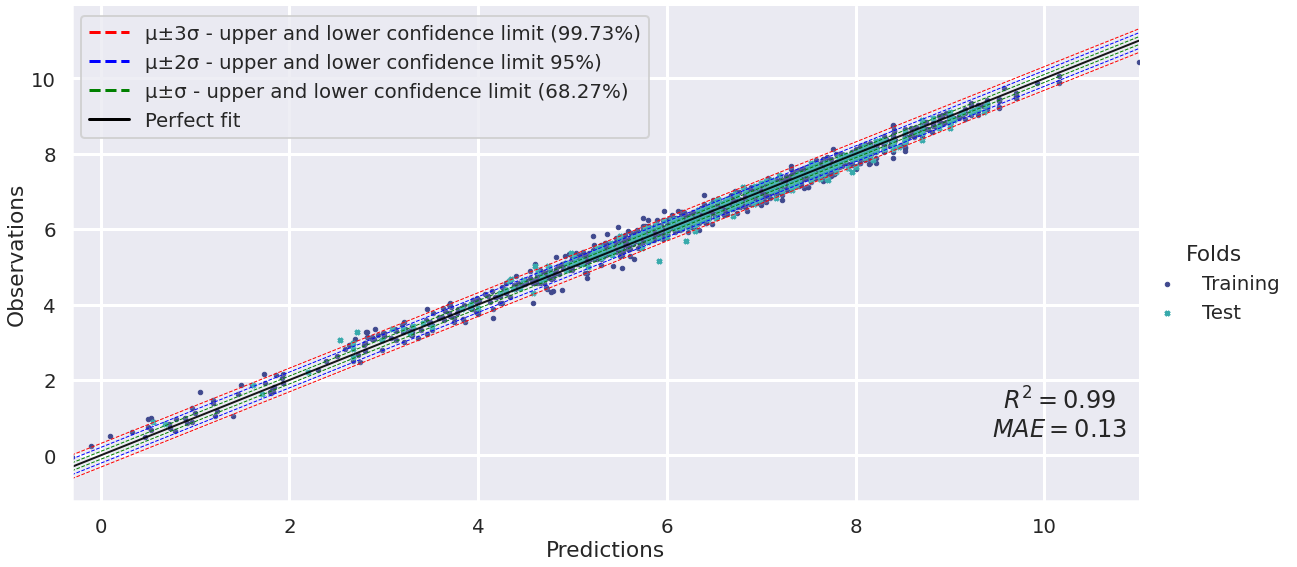

In [ ]:
#@title Gráfico de análise para o melhor modelo 10-Fold   { form-width: "20%" }
sns.set_style("darkgrid")
sns.set_context("poster", font_scale = 0.9, rc={"grid.linewidth": 3})
g= sns.lmplot(x="obs", y="pred", hue="Folds",order=2, data=results, fit_reg=False, height=8, 
               markers=["o", "x"], palette="mako", scatter_kws={"s": 20,'alpha': 1},  aspect= 20/10 )

sns.regplot(x="obs", y="u+3sigma", data=results, scatter=False, ax=g.axes[0, 0], line_kws={'lw': 1, 'color': 'red','linestyle' : '--' })
sns.regplot(x="obs", y="u+2sigma", data=results, scatter=False, ax=g.axes[0, 0],  line_kws={'lw': 1, 'color': 'blue','linestyle' : '--' })
sns.regplot(x="obs", y="u+sigma", data=results, scatter=False, ax=g.axes[0, 0],  line_kws={'lw': 1, 'color': 'green','linestyle' : '--' })
sns.regplot(x="obs", y="u-sigma", data=results, scatter=False, ax=g.axes[0, 0],  line_kws={'lw': 1, 'color': 'green','linestyle' : '--' })
sns.regplot(x="obs", y="u-2sigma", data=results, scatter=False, ax=g.axes[0, 0],  line_kws={'lw': 1, 'color': 'blue','linestyle' : '--' })
sns.regplot(x="obs", y="u-3sigma", data=results, scatter=False, ax=g.axes[0, 0], line_kws={'lw': 1,  'color': 'red','linestyle' : '--' })
sns.regplot(x="obs", y="obs",order=2, data=results, scatter=False, line_kws={'lw': 2,'alpha': 0.9, 'color': 'black','linestyle' : '-' })
g.set(xlabel="Predictions", ylabel = "Observations")
labels_stat = (r'$R^2={:.2f} $' + '\n' + r'$MAE={:.2f} $') .format(model.R2,model.MAE_test)
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='The red data',linestyle='--', linewidth=1)
red_patch1 = mpatches.Patch(color='blue', label='The red data',linestyle='--', linewidth=1)
from matplotlib.lines import Line2D
colors = ['red', 'blue', 'green', 'black']
linestyles = ['--', '--', '--', '-']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle=l) for c, l in zip(colors, linestyles)]
labels = ['\u03bc\u00B13\u03c3 - upper and lower confidence limit (99.73%)', '\u03bc\u00B12\u03c3 - upper and lower confidence limit 95%)', '\u03bc\u00B1\u03c3 - upper and lower confidence limit (68.27%)',
          'Perfect fit']
plt.legend(lines, labels)
plt.suptitle( labels_stat ,
                  fontsize=24, fontdict={"weight": "bold"},  x=0.815, y = 0.3 )


## Removing Outiers (> 3* sigma)

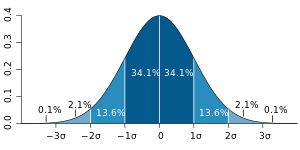

Analysed samples that are within +3 to -3 standard deviations    :  1524
Removed samples > 3* sigma     :  94


Text(0.815, 0.3, '$R^2=0.99 $\n$MAE=0.11 $')

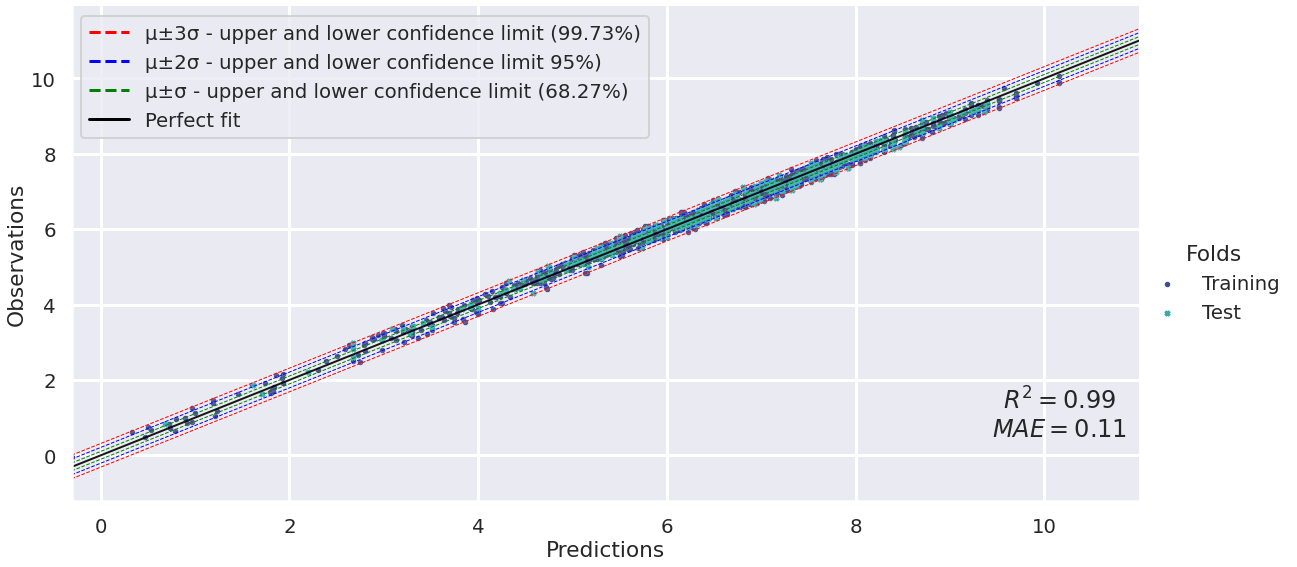

In [ ]:
#@title Gráfico de análise para o melhor modelo 10-Fold removendo os outliers   { form-width: "20%" }

print ("Analysed samples that are within +3 to -3 standard deviations    : ", model.crossval_df.shape[0])
print ("Removed samples > 3* sigma     : ", moldf.shape[0]-model.crossval_df.shape[0])


sns.set_style("darkgrid")
sns.set_context("poster", font_scale = 0.9, rc={"grid.linewidth": 3})
g= sns.lmplot(x="obs", y="pred", hue="Folds",order=2, data=model.crossval_df, fit_reg=False, height=8, 
               markers=["o", "x"], palette="mako", scatter_kws={"s": 20,'alpha': 1},  aspect= 20/10 )

sns.regplot(x="obs", y="u+3sigma", data=results, scatter=False, ax=g.axes[0, 0], line_kws={'lw': 1, 'color': 'red','linestyle' : '--' })
sns.regplot(x="obs", y="u+2sigma", data=results, scatter=False, ax=g.axes[0, 0],  line_kws={'lw': 1, 'color': 'blue','linestyle' : '--' })
sns.regplot(x="obs", y="u+sigma", data=results, scatter=False, ax=g.axes[0, 0],  line_kws={'lw': 1, 'color': 'green','linestyle' : '--' })
sns.regplot(x="obs", y="u-sigma", data=results, scatter=False, ax=g.axes[0, 0],  line_kws={'lw': 1, 'color': 'green','linestyle' : '--' })
sns.regplot(x="obs", y="u-2sigma", data=results, scatter=False, ax=g.axes[0, 0],  line_kws={'lw': 1, 'color': 'blue','linestyle' : '--' })
sns.regplot(x="obs", y="u-3sigma", data=results, scatter=False, ax=g.axes[0, 0], line_kws={'lw': 1,  'color': 'red','linestyle' : '--' })
sns.regplot(x="obs", y="obs",order=2, data=results, scatter=False, line_kws={'lw': 2,'alpha': 0.9, 'color': 'black','linestyle' : '-' })
g.set(xlabel="Predictions", ylabel = "Observations")
r2_ext_out= np.round( r2_score(model.crossval_df_training.obs,model.crossval_df_training.pred), 2 )
mae_ext_out = np.round( mean_absolute_error(model.crossval_df_training.obs,model.crossval_df_training.pred), 2)
labels_stat = (r'$R^2={:.2f} $' + '\n' + r'$MAE={:.2f} $') .format(r2_ext_out,mae_ext_out )
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='The red data',linestyle='--', linewidth=1)
red_patch1 = mpatches.Patch(color='blue', label='The red data',linestyle='--', linewidth=1)
from matplotlib.lines import Line2D
colors = ['red', 'blue', 'green', 'black']
linestyles = ['--', '--', '--', '-']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle=l) for c, l in zip(colors, linestyles)]
labels = ['\u03bc\u00B13\u03c3 - upper and lower confidence limit (99.73%)', '\u03bc\u00B12\u03c3 - upper and lower confidence limit 95%)', '\u03bc\u00B1\u03c3 - upper and lower confidence limit (68.27%)',
          'Perfect fit']
plt.legend(lines, labels)
plt.suptitle( labels_stat ,fontsize=24, fontdict={"weight": "bold"},  x=0.815, y = 0.3 )

In [ ]:
print ("R2 training     : ", model.R2)
print ("rmse training   : ",  model.rmse_train)
print ("MAE training    : ", model.MAE_train)
print ("R2_ext Tes     : ", model.R2_ext)
print ("rmse Test     : ", model.rmse_test) 
print ("MAE test      : ", model.MAE_test)

R2 training     :  0.99
rmse training   :  0.17
MAE training    :  0.13
R2_ext Tes     :  1.0
rmse Test     :  0.16
MAE test      :  0.13


## Salva o melhor modelo (Cuidado)

In [ ]:
 from joblib import dump, load
path_data = 'data/models/'
dump(  opt.best_estimator_, path_data+model_name+'.joblib') 

['data/models/p56_lck.joblib']

# Neural Networks

Go to local Path

In [ ]:
%cd /content/

/content


# Setup
Start out by installing the experiment tracking library and setting up your free W&B account:


*   **pip install wandb** – Install the W&B library
*   **import wandb** – Import the wandb library

In [ ]:
# WandB – Install the W&B library
!pip install wandb -q
!pip install opencv-python
import wandb
from wandb.keras import WandbCallback

     |████████████████████████████████| 1.8MB 32.1MB/s 
     |████████████████████████████████| 133kB 46.8MB/s 
     |████████████████████████████████| 102kB 14.3MB/s 
     |████████████████████████████████| 174kB 52.2MB/s 
     |████████████████████████████████| 71kB 10.9MB/s 


## Rede neural

### Define Your Neural Network
Before we can run the sweep, let's define a function that creates and trains our neural network.

In the function below, we define a simplified version of a VGG19 model in Keras, and add the following lines of code to log models metrics, visualize performance and output and track our experiments easily:
*   **wandb.init()** – Initialize a new W&B run. Each run is single execution of the training script.
*   **wandb.config** – Save all your hyperparameters in a config object. This lets you use our app to sort and compare your runs by hyperparameter values.
*   **callbacks=[WandbCallback()]** – Fetch all layer dimensions, model parameters and log them automatically to your W&B dashboard.
*   **wandb.log()** – Logs custom objects – these can be images, videos, audio files, HTML, plots, point clouds etc. Here we use wandb.log to log images of Simpson characters overlaid with actual and predicted labels.

In [ ]:
# The sweep calls this function with each set of hyperparameters
def train(callback='general'):
    # # Initialize wandb with a sample project name
    # wandb.init(project="hyperparameter-sweeps-partsI")

    # Default values for hyper-parameters we're going to sweep over
    config_defaults = {
        'test_size': 0.2902,
        'epochs': 150,
        'dropout': 0.3,
        'layer_size_1': 16,
        'layer_size_2': 16,
        'layer_size_3': 16,
        'layer_size_4': 16,
        'layer_size_5': 16,
        'layer_size_6': 16,
        'layer_size_7': 16,
        'batch_size': 128,
        'weight_decay': 0.005,
        'learning_rate': 0.0001,
        'activation': 'relu',
        'optimizer': 'nadam',
        'seed': 42,
        'model_number': 42        
    }

    # Initialize a new wandb run
    wandb.init(config=config_defaults)
    
    # Config is a variable that holds and saves hyperparameters and inputs
    config = wandb.config

    #split dataset
    X_train, X_test, y_train, y_test = get_train_split(X, y_raw, test_size= config.test_size)
    
    # Determine input shape
    input_shape = (X_train.shape[1])
    
    # Define the model architecture - This is a simplified version of the VGG19 architecture
    model = Sequential()
        #input layer
    model.add(Dense(config.layer_size_1, input_dim=input_shape))
    model.add(BatchNormalization())
    model.add(Activation(config.activation))
    model.add(Dropout(config.dropout))
  	# hidden layers
    model.add(Dense(config.layer_size_2))
    model.add(BatchNormalization())
    model.add(Activation(config.activation))
    model.add(Dropout(config.dropout))
  	# hidden layers
    model.add(Dense(config.layer_size_3))
    model.add(BatchNormalization())
    model.add(Activation(config.activation))
    model.add(Dropout(config.dropout)) 
  	# hidden layers
    model.add(Dense(config.layer_size_4))
    model.add(BatchNormalization())
    model.add(Activation(config.activation))
    model.add(Dropout(config.dropout))   
  	# hidden layers
    model.add(Dense(config.layer_size_5))
    model.add(BatchNormalization())
    model.add(Activation(config.activation))
    model.add(Dropout(config.dropout))   
  	# hidden layers
    model.add(Dense(config.layer_size_6))
    model.add(BatchNormalization())
    model.add(Activation(config.activation))
    model.add(Dropout(config.dropout))   
  	# hidden layers
    model.add(Dense(config.layer_size_7))
    model.add(BatchNormalization())
    model.add(Activation(config.activation))
    model.add(Dropout(config.dropout))   


    model.add(Dense(y_train.shape[1], activation = 'linear'))

    # Define the optimizer
    if config.optimizer=='sgd':
      optimizer = SGD(learning_rate=config.learning_rate, decay=1e-5, momentum=0.9, nesterov=True)
    elif config.optimizer=='rmsprop':
      optimizer = RMSprop(learning_rate=config.learning_rate, decay=1e-5)
    elif config.optimizer=='adam':
      optimizer = Adam(learning_rate=config.learning_rate, beta_1=0.9, beta_2=0.999, clipnorm=1.0)
    elif config.optimizer=='nadam':
      optimizer = Nadam(learning_rate=config.learning_rate, beta_1=0.9, beta_2=0.999, clipnorm=1.0)

    model.compile(loss='mean_squared_error', optimizer = optimizer, metrics= metrics_modeling)
    # Add WandbCallback() to the fit function
    monitor_keras= 'val_mean_squared_error'
    mode_keras= 'min'
    monitor_save= 'val_mean_squared_error'
    mode_save= 'min'
    patience_ReduceLROnPlateau= 20
    patience_EarlyStopping= 50

    if callback=='general':
      WandbCallback_list = [WandbCallback(data_type='None', monitor = monitor_keras , mode=mode_keras ), 
                            EarlyStopping(monitor=monitor_save, patience=patience_EarlyStopping,verbose=0, mode=mode_save, restore_best_weights=True),
                            ReduceLROnPlateau(monitor=monitor_keras, factor=0.2, patience=patience_ReduceLROnPlateau, verbose=0, mode=mode_keras),
                            ModelCheckpoint(model_name+'_'+str(config.model_number)+'.h5', save_best_only=True,verbose=0, monitor=monitor_save, mode=mode_save)]                                              

      model.fit(X_train, y_train,  validation_data=(X_test, y_test), batch_size=config.batch_size ,epochs=config.epochs, callbacks=WandbCallback_list, verbose = 0)

      a = '/content/'+model_name+'_'+str(config.model_number)+'.h5'
      %mv $a gdrive/My\ Drive/$varpath/data/models/opt/


    if callback=='save':
      WandbCallback_list = [WandbCallback(data_type='None', monitor = monitor_keras , mode=mode_keras ), 
                            EarlyStopping(monitor=monitor_save, patience=patience_EarlyStopping,verbose=0, mode=mode_save, restore_best_weights=True),
                            ReduceLROnPlateau(monitor=monitor_keras, factor=0.2, patience=patience_ReduceLROnPlateau, verbose=0, mode=mode_keras),
                            ModelCheckpoint(filepath=model_name+'.h5', save_best_only=True,verbose=0, monitor=monitor_save, mode=mode_save)]


      model.fit(X_train, y_train,  validation_data=(X_test, y_test), batch_size=config.batch_size ,epochs=config.epochs, callbacks=WandbCallback_list, verbose = 0)

      return X_train, X_test, y_train, y_test, model
      

# Otimizar as hidden layers da rede neural

## 1. Define the Sweep

Weights & Biases sweeps give you powerful levers to configure your sweeps exactly how you want them, with just a few lines of code. The sweeps config can be defined as a dictionary or a [YAML file](https://docs.wandb.com/library/sweeps).

Let's walk through some of them together:
*   **Metric** – This is the metric the sweeps are attempting to optimize. Metrics can take a `name` (this metric should be logged by your training script) and a `goal` (maximize or minimize). 
*   **Search Strategy** – Specified using the 'method' variable. We support several different search strategies with sweeps. 
  *   **Grid Search** – Iterates over every combination of hyperparameter values.
  *   **Random Search** – Iterates over randomly chosen combinations of hyperparameter values.
  *   **Bayesian Search** – Creates a probabilistic model that maps hyperparameters to probability of a metric score, and chooses parameters with high probability of improving the metric. The objective of Bayesian optimization is to spend more time in picking the hyperparameter values, but in doing so trying out fewer hyperparameter values.
*   **Stopping Criteria** – The strategy for determining when to kill off poorly peforming runs, and try more combinations faster. We offer several custom scheduling algorithms like [HyperBand](https://arxiv.org/pdf/1603.06560.pdf) and Envelope.
*   **Parameters** – A dictionary containing the hyperparameter names, and discreet values, max and min values or distributions from which to pull their values to sweep over.

You can find a list of all configuration options [here](https://docs.wandb.com/library/sweeps/configuration).

### A Note To Advanced Users

Advanced users can modify sweep algorithms or write their own based on the W&B base classes `wandb.sweeps.base.Search` and `wandb.sweeps.base.EarlyTerminate`, which you can find in our [open source client library](https://github.com/wandb/client).

They can also create a [local controller](https://docs.wandb.com/library/sweeps/local-controller), which lets users take full control of search and stopping criteria, inspect and modify the code in order to debug issues as well as develop new features which can be incorporated into the cloud service.

In [ ]:
# Configure the sweep – specify the parameters to search through, the search strategy, the optimization metric et all.
sweep_config = {
    'method':  'bayes',  # grid, random, bayes
    'metric': {
      'name': 'val_r2_keras',
      'goal': 'maximize'   
    },
    'early_terminate': {
      'type': 'hyperband',
      'max_iter': 10,
      's': 2,  
    },   
    'parameters': {
        'test_size': {
         #'values' : [0.2]
         'distribution': 'uniform', 
         'min' : 0.2,
         'max': 0.4,
        },        
        'epochs': {
            'values': [300] #[50, 100, 150, 300]
        },
        'dropout': {
          'distribution': 'uniform',
          'min' : 0.0,
          'max': 0.1,
        },
        'layer_size_1': {
            'values': [16, 32, 64, 256, 512, 1024 , 2048, 4072]
        },
        'layer_size_2': {
            'values': [16, 32, 64, 128, 256, 512, 1024, 2048, 4072]
        },
        'layer_size_3': {
            'values': [16, 32, 64, 128, 256, 512, 1024, 2048, 4072]
        },
        'layer_size_4': {
            'values': [16, 32, 64, 128, 256, 512, 1024, 2048, 4072]
        },
        'layer_size_5': {
             'values': [16, 32, 64, 128, 256, 512, 1024, 2048, 4072]
        },  
        'layer_size_6': {
            'values': [16, 32, 64, 128, 256, 512, 1024, 2048, 4072]
        },  
        'layer_size_7': {
            'values': [16, 32, 64, 128, 256, 512, 1024, 2048, 4072]
        },  
        'model_number': {
          'distribution': 'int_uniform',
          'min' : 1,
          'max': 10000,
        },                                                           
        'batch_size': {
          'distribution': 'int_uniform',
          'min' : 10,
          'max': 300,
        },
        'weight_decay': {
            'values': [0.05] # [0.0005, 0.005, 0.05]
        },
        'learning_rate': {
            'values': [1e-2] #[1e-2, 1e-3, 1e-4, 3e-4, 3e-5, 1e-5]
        },
        'optimizer': {
            'values': ['adam', 'nadam'] # ['adam', 'nadam', 'sgd', 'rmsprop']
        },
        'activation': {
            'values': ['relu'] # ['elu', 'relu', 'selu', 'softmax'] 
        }
    }
}        


## 2. Initialize the Sweep

In [ ]:
# Initialize a new sweep
# Arguments:
#     – sweep_config: the sweep config dictionary defined above
#     – entity: Set the username for the sweep
#     – project: Set the project name for the sweep

sweep_id = wandb.sweep(sweep_config, entity="rcbraga", project= model_name)

In [ ]:
#%%capture
# Initialize a new sweep
# Arguments:
#     – sweep_id: the sweep_id to run - this was returned above by wandb.sweep()
#     – function: function that defines your model architecture and trains it
wandb.agent(sweep_id, function=train)

# Restart no Sweep (se for necessário)

In [ ]:
wandb.agent("xqgeawyf",entity="rcbraga", project= model_name, function=train)

# Carregar o modelo do Drive

In [ ]:
a = model_name+'.h5'
b =  '/content/'
%cp  gdrive/My\ Drive/$varpath/data/models/$a $b

### Ler Modelo 

In [ ]:
from keras.models import load_model
METRICS = {

    'sensitivity': sensitivity,
    'specificity': specificity,
    'BAC': BAC,
    'f1': f1,
    'fmed': fmed,
    'r2_keras' : r2_keras,
    'mean_squared_error' : tf.keras.losses.MSE,
    'mean_absolute_percentage_error' : tf.keras.losses.MeanAbsolutePercentageError,
    'mean_absolute_error' : tf.keras.losses.MAE
}

model = keras.models.load_model(filepath= model_name+'.h5' , custom_objects=METRICS, compile=False)

## Analisa a distro dos Dados




In [ ]:
X_train, X_test, y_train, y_test = get_train_split(X, y_raw, test_size= 0.2)

BATCH_SIZE = 5000
train_predictions_weighted = model.predict(X_train, batch_size=BATCH_SIZE)
test_predictions_weighted = model.predict(X_test, batch_size=BATCH_SIZE)
train_data = {'Ypred':np.hstack(train_predictions_weighted), 'Yobs': np.hstack(y_train)}
test_data = {'Ypred':np.hstack(np.vstack(test_predictions_weighted)), 'Yobs':np.hstack(y_test)}
micromol = lambda val: (10**6)*10**(-val)
crossval_df_training =  pd.DataFrame(train_data)
crossval_df_training['Folds'] = 'Training'
crossval_df_training['Folds error'] = np.absolute (crossval_df_training.Yobs-crossval_df_training.Ypred)
crossval_df_training['Folds error Mean'] = np.mean(np.absolute (crossval_df_training.Yobs-crossval_df_training.Ypred))
crossval_df_training['Folds error 3*sigma'] = 3* np.std(crossval_df_training['Folds error'])
crossval_df_test =  pd.DataFrame(test_data)
crossval_df_test['Folds'] = 'Test'
crossval_df_test['Folds error'] = np.absolute (crossval_df_test.Yobs-crossval_df_test.Ypred)
crossval_df_test['Folds error Mean'] = np.mean(np.absolute (crossval_df_test.Yobs-crossval_df_test.Ypred))
crossval_df_test['Folds error 3*sigma'] = 3* np.std(crossval_df_test['Folds error'])
crossval_df = pd.concat([crossval_df_training,crossval_df_test], axis=0)
g = sns.lmplot(x="Ypred", y="Yobs", hue="Folds",order=2, data=crossval_df, fit_reg=False, height=9,
               markers=["o", "x"], palette="Dark2",scatter_kws={"s": 5,'alpha':0.6},  aspect=32/32)
sns.regplot(x="Ypred", y="Yobs", data=crossval_df, scatter=False, ax=g.axes[0, 0])
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print ("R2 training     : ", np.round( r2_score(crossval_df_training.Yobs,crossval_df_training.Ypred), 2 ))
print ("rmse training   : ", np.round( np.sqrt(mean_squared_error(crossval_df_training.Yobs,crossval_df_training.Ypred)) , 2))
print ("MAE training    : ", np.round( mean_absolute_error(crossval_df_training.Yobs,crossval_df_training.Ypred), 2))
print ("R2ext Tes     : ", np.round( r2_score(crossval_df_test.Yobs,crossval_df_test.Ypred), 2 ))
print ("rmse Test     : ", np.round( np.sqrt(mean_squared_error(crossval_df_test.Yobs,crossval_df_test.Ypred)) , 2)) 
print ("MAE test      : ", np.round( mean_absolute_error(crossval_df_test.Yobs,crossval_df_test.Ypred), 2))


## Removing Outiers (> 3* sigma)

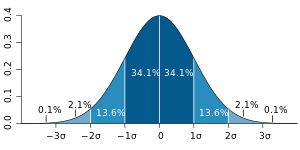

In [ ]:
crossval_df_training=crossval_df_training[crossval_df_training['Folds error']<=(crossval_df_training['Folds error 3*sigma'])] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
crossval_df_test=crossval_df_test[crossval_df_test['Folds error']<=(crossval_df_test['Folds error 3*sigma'])] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
crossval_df = pd.concat([crossval_df_training,crossval_df_test], axis=0)
g = sns.lmplot(x="Ypred", y="Yobs", hue="Folds",order=2, data=crossval_df, fit_reg=False, height=9, 
               markers=["o", "x"], palette="Dark2", scatter_kws={"s": 5,'alpha':0.9},  aspect=32/32)
sns.regplot(x="Ypred", y="Yobs", data=crossval_df, scatter=False, ax=g.axes[0, 0])

print ("Analysed samples that are within +3 to -3 standard deviations    : ", crossval_df.shape[0])
print ("Removed samples > 3* sigma     : ", moldf.shape[0]-crossval_df.shape[0])
print ("R2 training     : ", np.round( r2_score(crossval_df_training.Yobs,crossval_df_training.Ypred), 2 ))
print ("rmse training   : ", np.round( np.sqrt(mean_squared_error(crossval_df_training.Yobs,crossval_df_training.Ypred)) , 2))
print ("MAE training    : ", np.round( mean_absolute_error(crossval_df_training.Yobs,crossval_df_training.Ypred), 2))
print ("R2ext Tes     : ", np.round( r2_score(crossval_df_test.Yobs,crossval_df_test.Ypred), 2 ))
print ("rmse Test     : ", np.round( np.sqrt(mean_squared_error(crossval_df_test.Yobs,crossval_df_test.Ypred)) , 2)) 
print ("MAE test      : ", np.round( mean_absolute_error(crossval_df_test.Yobs,crossval_df_test.Ypred), 2))




# Domínio de aplicabilidade (AD)





In [ ]:
data_ad = get_data(model_name='insilicall_inner', database='prod')

In [ ]:
data_ad.head(10)

,name,smiles,cas,analysed,fingerprint,id,mutagenicity_global,toxicity_global,lipinski,absortion,metabolism,evaluations_count,status,image,created_at,updated_at,deleted_at,contribution_mapping,biological_similarity_status,has_alerts
0,Loxicodegol,COCCOCCOCCOCCOCCOCCO[C@H]1CC[C@@]2(O)[C@H]3Cc4...,None,False,30fcdf2e0add98e1dc0fd2e7af8e34cb,581509,"{'prediction': 0.6, 'rules': ['Strain TA1535']}","{'prediction': 1, 'rules': ['Mutagenicity Risk']}","{'prediction': 2, 'rules': ['MW', 'HBA']}","{'prediction': 2, 'rules': ['Size', 'Too many ...","{'prediction': 2.93, 'rules': ['CYP3A4', 'mida...",272,2,None,None,2021-07-16 06:30:55+00:00,None,None,0,True
1,Glyceryl stearate SE,CCCCCCCCCCCCCCCCCC(=O)OC(CO)CO,None,False,6ab57d4105a06bbc0508de944b7d4092,581510,"{'prediction': 0, 'rules': []}","{'prediction': 1.25, 'rules': ['Low Lipophilic...","{'prediction': 1, 'rules': ['logP']}","{'prediction': 1.25, 'rules': [' Low Lipophili...","{'prediction': 2, 'rules': ['Overall unbound I...",272,2,None,None,2021-07-16 06:30:57+00:00,None,None,0,True
2,Ginsenosides,CC(C)=CCCC(C)(O)[C@H]1CC[C@]2(C)C1CC[C@@H]1[C@...,None,False,9dcf74b0e9ab8d1c355cd4052b46db11,581511,"{'prediction': 0, 'rules': []}","{'prediction': 2, 'rules': ['Low Lipophilicity...","{'prediction': 1, 'rules': ['logP']}","{'prediction': 2, 'rules': [' Low Lipophilicit...","{'prediction': 3.44, 'rules': ['Overall unboun...",272,2,None,None,2021-07-16 06:30:58+00:00,None,None,0,True
3,Titanium,[Ti],None,False,75d2ebfadee09dc5a1d61475b98fb2f1,581514,"{'prediction': 2.4, 'rules': ['Strain TA100', ...","{'prediction': 2.63, 'rules': ['Hepatotoxicity...","{'prediction': 0, 'rules': []}","{'prediction': 0.63, 'rules': ['Low Solubility']}","{'prediction': 1, 'rules': ['Overall unbound I...",272,2,None,None,2021-07-16 06:31:01+00:00,None,None,0,True
4,Diazolidinylurea,O=C1C(N(CO)C(=O)NCO)N(CO)C(=O)N1CO,None,False,b05fa78e64373e304d39fb29280a09c9,581515,"{'prediction': 3.0, 'rules': ['Mutagenicity Gl...","{'prediction': 1.84, 'rules': ['Low Permeabili...","{'prediction': 0, 'rules': []}","{'prediction': 0.84, 'rules': ['Low Permeabili...","{'prediction': 1, 'rules': ['midazolam substra...",272,2,None,None,2021-07-16 06:31:03+00:00,None,None,0,True
5,Dipentamethylenethiuram disulfide,S=C(SSC(=S)N1CCCCC1)N1CCCCC1,None,False,4319f005ea4a1641b2419bd56317a24e,581517,"{'prediction': 0.3, 'rules': ['Strain TA100 (m...","{'prediction': 2.84, 'rules': ['Hepatotoxicity...","{'prediction': 0, 'rules': []}","{'prediction': 0.84, 'rules': ['Low Solubility']}","{'prediction': 1.78, 'rules': ['Overall unboun...",272,2,None,None,2021-07-23 04:11:31+00:00,None,None,0,True
6,Cinnamaldehyde,O=C/C=C/c1ccccc1,None,False,ae7351d3267ba295626935c5c4b89fe8,581524,"{'prediction': 0.6, 'rules': ['Mutagenicity Gl...","{'prediction': 2, 'rules': ['Hepatotoxicity', ...","{'prediction': 0, 'rules': []}","{'prediction': 0, 'rules': []}","{'prediction': 0.59, 'rules': ['Overall unboun...",272,2,None,None,2021-07-16 06:31:18+00:00,None,None,0,True
7,Hydroxycitronellal,CC(CC=O)CCCC(C)(C)O,None,False,8a92c1e98fe96b4c54313c494beff374,581525,"{'prediction': 0, 'rules': []}","{'prediction': 0, 'rules': []}","{'prediction': 0, 'rules': []}","{'prediction': 0, 'rules': []}","{'prediction': 0, 'rules': []}",272,2,None,None,2021-07-16 06:31:20+00:00,None,None,0,True
8,Diphenylguanidine,N=C(Nc1ccccc1)Nc1ccccc1,None,False,ac0b71b7d0fd3b111681e9e2eadbd9b0,581526,"{'prediction': 0, 'rules': []}","{'prediction': 1, 'rules': ['Hepatotoxicity']}","{'prediction': 0, 'rules': []}","{'prediction': 0, 'rules': []}","{'prediction': 1.69, 'rules': ['CYP2C19', 'CYP...",272,2,None,None,2021-07-16 06:31:21+00:00,None,None,0,True
9,Cinnamyl alcohol,OC/C=C/c1ccccc1,None,False,4dc60af8965b5d6ce8f02f1f1e124f3e,581527,"{'prediction': 0, 'rules': []}","{'prediction': 1, 'rules': ['Hepatotoxicity']}","{'prediction': 0, 'rules': []}","{'prediction': 0, 'rules': []}","{'prediction': 0, 'rules': []}",272,2,None,None,2021-07-16 06:31:23+00:00,None,None,0,True

In [ ]:
from rdkit import Chem
from rdkit import DataStructs
import pandas as pd
values = data_ad['smiles'].values
target = Chem.RDKFingerprint( Chem.MolFromSmiles( (values[:1][0] )) )
smiles_rest = np.delete(values, 0)
d = {'smiles': smiles_rest}

df = pd.DataFrame(data=d)

df['Tanimoto'] = DataStructs.BulkTanimotoSimilarity(target, [Chem.RDKFingerprint(Chem.MolFromSmiles(s)) for s in df['smiles']])

print(df)

                                                   smiles  Tanimoto
0                          CCCCCCCCCCCCCCCCCC(=O)OC(CO)CO  0.079425
1       CC(C)=CCCC(C)(O)[C@H]1CC[C@]2(C)C1CC[C@@H]1[C@...  0.139564
2                                                    [Ti]  0.000000
3                      O=C1C(N(CO)C(=O)NCO)N(CO)C(=O)N1CO  0.230859
4                            S=C(SSC(=S)N1CCCCC1)N1CCCCC1  0.103960
...                                                   ...       ...
153421             Cc1ccc(C(c2c3[nH]nc2-c2cccs2)NC3=O)cc1  0.521505
153422       Cc1n[nH]c(C2=O)c1C(c(cccc1)c1F)N2c1ccc(C)cc1  0.531132
153423         CCCOc1c(C(C2)c(cc3OCCOc3c3)c3NC2=O)cccc1OC  0.489831
153424   Cc1n[nH]c(N2)c1C(c(cc1)ccc1OCc(cccc1)c1Cl)SCC2=O  0.460460
153425  CCOC(c(s1)c(C)n2c1nc(-c(cc1)cc(OC)c1O)c2NCc1c(...  0.594651

[153426 rows x 2 columns]


In [ ]:
df =df.sort_values(by='Tanimoto', ascending=False)
data_ad = df[:10000]
data_ad['name'] = 'NaN'
df = pd.concat([moldf, data_ad])
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,name,cas,smiles,fingerprint,potency,outcome,reference,m,maccs,morgan,Class Membership (-log(Prop)),Tanimoto
0,1543.0,chembl308048,None,N#C/C(=C\c1ccc(O)cc1)C(N)=O,8ae5c8fec096d86eecd6f7ac79aeab38,3.000,1000.00000,CHEMBL1126592,N#C/C(=C\c1ccc(O)cc1)C(N)=O,\x0000000000020400001011100a40228008c880f53e,\x00000802001080000400000000000000001408000400...,0 [-0.308 4.509],NaN
1,1506.0,chembl100016,None,Oc1cccc(/C=C/c2cccc(O)c2)c1,e092a74fb300decd61cc7210fc4eb7fe,3.631,234.00000,CHEMBL1126838,Oc1cccc(/C=C/c2cccc(O)c2)c1,\x000000000000000000000000080002a0088802a13c,\x00800000000000000701000000000000000000000000...,0 [-0.308 4.509],NaN
2,1480.0,chembl112925,None,Nc1ccc(-c2cc(=O)c3cc(N)ccc3o2)cc1,6b2476ebac269e1d6dd87cb1900558a3,3.987,103.00000,CHEMBL1127357,Nc1ccc(-c2cc(=O)c3cc(N)ccc3o2)cc1,\x000000000000004200001002240202a0a8c282d53e,\x00000000000000001000000000004002800509040040...,0 [-0.308 4.509],NaN
3,1.0,chembl215969,None,CNc1ncc2cc(-c3cc(C(=O)Nc4cccc(C(F)(F)F)c4C)ccc...,772f8a941f806ef592ac74c7da141ead,11.000,0.00001,CHEMBL1149344,CNc1ncc2cc(-c3cc(C(=O)Nc4cccc(C(F)(F)F)c4C)ccc...,\x000000020004004002200130244e2123e862e3543f,\x00c00000034000000102000000000400010500280300...,8 [ 8.409 11. ],NaN
4,2.0,chembl569496,None,CCN1CCN(C(=O)Nc2cccc3ccccc23)C[C@H]1[C@H](C)Nc...,a239f964b881b756d8458a4b28ba1208,10.155,0.00007,CHEMBL1155973,CCN1CCN(C(=O)Nc2cccc3ccccc23)C[C@H]1[C@H](C)Nc...,\x000000026000004002a8690c35d67427ab46fa5e3f,\x02800018266030800102010040000000010421002580...,8 [ 8.409 11. ],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115687,NaN,NaN,NaN,Cn(c1c2cccc1)c1c2C(C(NCCCN2CCOCC2)=O)=NN(c(cc2...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.587710
132444,NaN,NaN,NaN,Cc(ccc(F)c1)c1S(N(CCC1)CCN1c(n1ncnc1nc1)c1-c(c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.587705
103595,NaN,NaN,NaN,CC(N(C)c1cc(-c2cc(OC)ccc2)nn11)=C(CCC(Nc(cc2)c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.587705
69648,NaN,NaN,NaN,CC(CC1)CCN1C(c(n1CC2)c(-c(cc3)ccc3F)nc1S2(=O)=...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.587701


### avaliar todos os dados contra a dataset do modelo

In [ ]:
_start = time.time()
ad_list =  ad_batch(df, df.shape[0])
print(f"Execution time: {  (time.time() - _start )/60 }")

Execution time: 7.077221790949504


In [ ]:
distance_AD = pd.DataFrame(ad_list)

In [ ]:
distance_AD.rename(columns={distance_AD.columns[0]: 'smiles', distance_AD.columns[1]: 'outcome'}, inplace=True)

In [ ]:
distance_AD

,smiles,outcome
0,N#C/C(=C\c1ccc(O)cc1)C(N)=O,1
1,Oc1cccc(/C=C/c2cccc(O)c2)c1,1
2,Nc1ccc(-c2cc(=O)c3cc(N)ccc3o2)cc1,1
3,CNc1ncc2cc(-c3cc(C(=O)Nc4cccc(C(F)(F)F)c4C)ccc...,1
4,CCN1CCN(C(=O)Nc2cccc3ccccc23)C[C@H]1[C@H](C)Nc...,1
...,...,...
11699,Cn(c1c2cccc1)c1c2C(C(NCCCN2CCOCC2)=O)=NN(c(cc2...,0
11700,Cc(ccc(F)c1)c1S(N(CCC1)CCN1c(n1ncnc1nc1)c1-c(c...,0
11701,CC(N(C)c1cc(-c2cc(OC)ccc2)nn11)=C(CCC(Nc(cc2)c...,0
11702,CC(CC1)CCN1C(c(n1CC2)c(-c(cc3)ccc3F)nc1S2(=O)=...,0


In [ ]:
from collections import Counter
import seaborn as sns
from scipy import stats
from collections import Counter
sns.set(color_codes=True)
counter = Counter(distance_AD.outcome)
for k,v in counter.items():
	per = v / len(distance_AD.outcome) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=1, Count=1290, Percentage=11.022%
Class=0, Count=10414, Percentage=88.978%


In [ ]:
# #1. Fingerprint para todos a set
X, y_raw = generate_arrays_from_file_anal(distance_AD, calcfp_desc , chunksSize =distance_AD.shape[0])
y = np.hstack(y_raw)

In [ ]:
mat =np.hstack((y_raw,X))
df = pd.DataFrame(mat)
df = df.add_prefix('var_')
df = df.rename(columns={'var_0': 'target'})
df.head()

,target,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,...,var_2009,var_2010,var_2011,var_2012,var_2013,var_2014,var_2015,var_2016,var_2017,var_2018,var_2019,var_2020,var_2021,var_2022,var_2023,var_2024,var_2025,var_2026,var_2027,var_2028,var_2029,var_2030,var_2031,var_2032,var_2033,var_2034,var_2035,var_2036,var_2037,var_2038,var_2039,var_2040,var_2041,var_2042,var_2043,var_2044,var_2045,var_2046,var_2047,var_2048
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = df['target'].astype(int)
X_infos = df.drop('target', 1).astype(int)

In [ ]:
neg, pos = np.bincount(distance_AD['outcome'])
total = neg + pos
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
total = len(moldf)
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight_var = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.08
Weight for class 1: 0.63


In [ ]:
# fit balanced xgboost on an imbalanced classification dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import lightgbm as lgb
from skopt import BayesSearchCV
from sklearn.metrics import *
import xgboost
import asyncio
import time
import concurrent.futures
RANDOM_STATE_SEED = 42

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=RANDOM_STATE_SEED)


scorer = 'balanced_accuracy'

lgb_model = lgb.LGBMClassifier(**{
     'learning_rate': 0.03,
     'num_leaves': 31,
     'max_bin': 5,
     'min_child_samples': 10,
     'feature_fraction': 1.0,
     'bagging_fraction': 0.85,
     'objective': 'binary',
     'n_jobs': -1,
     'scale_pos_weight':  10,
     'n_estimators':200})

grid= {
        'max_depth': (1, 40, 'uniform'),
        'max_bin': (2, 1500, 'uniform'),
        'num_leaves': (31, 80, 'uniform'),
        'learning_rate': (0.001, 0.35, 'log-uniform'),
        'n_estimators': (50, 100, 200, 300,500, 1000),  # integer valued parameter
        'min_child_weight': (0, 10),
        'min_child_samples': (0, 20),
         'max_delta_step': (0, 20),
        'subsample': (0.01, 1.0, 'uniform'),
         'colsample_bytree': (0.01, 1.0, 'uniform'),     
        'alpha': (1, 5, 'uniform'),  
        'scale_pos_weight': (1.01, 9.9, 'uniform'),  # integer valued parameter
    }

opt = BayesSearchCV(
   lgb_model,
   grid,
    n_iter= 10,
    cv=cv,
    scoring=scorer, 
    random_state= RANDOM_STATE_SEED,
    verbose= 3
)

_start = time.time()
opt.fit(X_infos, y)

print(f"Execution time: {  (time.time() - _start )/60 }")

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[LightGBM] [Warning] bagging_fraction is set=0.85, subsample=0.13556548021189216 will be ignored. Current value: bagging_fraction=0.85
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=0.7304484857455519 will be ignored. Current value: feature_fraction=1.0
[CV 1/10] END alpha=3, colsample_bytree=0.7304484857455519, learning_rate=0.23619987609992935, max_bin=475, max_delta_step=13, max_depth=17, min_child_samples=7, min_child_weight=7, n_estimators=200, num_leaves=63, scale_pos_weight=5.899179442688981, subsample=0.13556548021189216;, score=0.989 total time=   3.2s
[LightGBM] [Warning] bagging_fraction is set=0.85, subsample=0.13556548021189216 will be ignored. Current value: bagging_fraction=0.85
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=0.7304484857455519 will be ignored. Current value: feature_fraction=1.0
[CV 2/10] END alpha=3, colsample_bytree=0.7304484857455519, learning_rate=0.2

In [ ]:
print("val. score: %s" % opt.best_score_)
print("best params: %s" % str(opt.best_params_))

val. score: 0.9851657919167629
best params: OrderedDict([('alpha', 5), ('colsample_bytree', 0.7036152301751524), ('learning_rate', 0.16502198887228592), ('max_bin', 625), ('max_delta_step', 8), ('max_depth', 9), ('min_child_samples', 0), ('min_child_weight', 4), ('n_estimators', 300), ('num_leaves', 40), ('scale_pos_weight', 7.831993415661943), ('subsample', 0.4499578015509351)])


### Avaliar o treinamento

In [ ]:
# import sys
# def sizeof_fmt(num, suffix='B'):
#     ''' by Fred Cirera,  https://stackoverflow.com/a/1094933/1870254, modified'''
#     for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
#         if abs(num) < 1024.0:
#             return "%3.1f %s%s" % (num, unit, suffix)
#         num /= 1024.0
#     return "%.1f %s%s" % (num, 'Yi', suffix)

# for name, size in sorted(((name, sys.getsizeof(value)) for name, value in locals().items()),
#                          key= lambda x: -x[1])[:10]:
#     print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))

#limpar memória
import gc
del mat
del df
_=gc.collect()

### Avaliação do melhor modelo avaliando a dataset toda




somente a critério de avaliação gobal

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:183: UserWarning: FixedFormatter should only be used together with FixedLocator
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:184: UserWarning: FixedFormatter should only be used together with FixedLocator


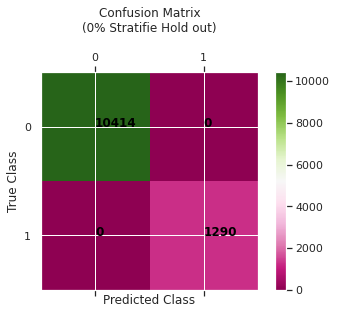

########################################
#   Unbalanced Statistical Parameters  #
########################################
Accuracy: 1.0
Area under the Curve (AUC): 1.0
########################################
#   Balanced Statistical Parameters    #
########################################
Correct Classification Rate (CCR): 1.0
Weighted Kappa:  1.0
########################################
#            Positive Class            #
########################################
Sensitivity (Se): 1.0
Positive Predictive Value (PPV): 1.0
########################################
#            Negative Class            #
########################################
Specificity (Sp): 1.0
Negative Predictive Value (NPV): 1.0
########################################
#     Other Statistical Parameters     #
########################################
Precision:  1.0
Recall:  1.0
F1:  1.0
########################################
#        Applicability Domain          #
########################################


In [ ]:
from sklearn.metrics import cohen_kappa_score
CCR, kappa,sens, spe = run_statistics(y, opt.best_estimator_.predict(X), 
                                                     label="0% Stratifie Hold out", coverage=100)

### Salva o melhor modelo (Cuidado)

In [ ]:
from joblib import dump, load
path_data = 'data/models/'
dump(opt.best_estimator_, path_data+model_name+'_AD.joblib') 

['data/models/p56_lck_AD.joblib']